In [2]:
import matplotlib.pyplot as plt
import pandas as pd

igs_data = pd.read_csv("merged_lz_houston_data.csv")
igs_data

Delivery Date_x  Hour Ending  Settlement Point Price Month  \
0          2023-01-01          1.0                   10.36   Jan   
1          2023-01-01          1.0                   10.36   Jan   
2          2023-01-01          2.0                    9.84   Jan   
3          2023-01-01          2.0                    9.84   Jan   
4          2023-01-01          3.0                    8.58   Jan   
...               ...          ...                     ...   ...   
17463      2023-12-31         24.0                   15.45   Dec   
17464             NaN          NaN                     NaN   NaN   
17465             NaN          NaN                     NaN   NaN   
17466             NaN          NaN                     NaN   NaN   
17467             NaN          NaN                     NaN   NaN   

                  DateTime ACCOUNT_NUMBER        LOCAL_FROM_DATETIME  \
0      2023-01-01 01:00:00      account_a  2023-01-01 01:00:00+00:00   
1      2023-01-01 01:00:00      account_b  2023-01-01 01:00:00+00:00   
2      2023-01-01 02:00:00      account_a  2023-01-01 02:00:00+00:00   
3      2023-01-01 02:00:00      account_b  2023-01-01 02:00:00+00:00   
4      2023-01-01 03:00:00      account_a  2023-01-01 03:00:00+00:00   
...                    ...            ...                        ...   
17463  2024-01-01 00:00:00            NaN                        NaN   
17464  2023-01-01 00:00:00      account_a  2023-01-01 00:00:00+00:00   
17465  2023-01-01 00:00:00      account_b  2023-01-01 00:00:00+00:00   
17466  2023-03-12 03:00:00      account_a  2023-03-12 03:00:00+00:00   
17467  2023-03-12 03:00:00      account_b  2023-03-12 03:00:00+00:00   

        QUANTITY UNIT_OF_MEASURE Delivery Date_y  Hour  
0        1.75950             kWh      2023-01-01   1.0  
1      197.89200             kWh      2023-01-01   1.0  
2        3.67425             kWh      2023-01-01   2.0  
3      192.37200             kWh      2023-01-01   2.0  
4        3.55350             kWh      2023-01-01   3.0  
...          ...             ...             ...   ...  
17463        NaN             NaN             NaN   NaN  
17464    1.93200             kWh      2023-01-01   0.0  
17465  186.30000             kWh      2023-01-01   0.0  
17466    2.08725             kWh      2023-03-12   3.0  
17467   89.07900             kWh      2023-03-12   3.0  

[17468 rows x 11 columns]

Merge the New data

In [3]:
import datetime

account = pd.read_excel("account_demand.xlsx")
account["LOCAL_FROM_DATETIME"] = pd.to_datetime(account["LOCAL_FROM_DATETIME"])
account["LOCAL_FROM_DATETIME"] = account["LOCAL_FROM_DATETIME"].apply(lambda time: time.replace(tzinfo=None))
prices = pd.read_excel("lz_houston_prices_2023.xlsx")

prices["Hour Beginning"] = prices["Hour Ending"].apply(lambda word: str(int(word[:2]) - 1) + ":00:00")
prices["Delivery Date"] = prices["Delivery Date"].astype(str)

prices["LOCAL_FROM_DATETIME"] = pd.to_datetime(prices["Delivery Date"] + " " + prices["Hour Beginning"])

In [4]:
igs_data = pd.merge(account, prices, on = "LOCAL_FROM_DATETIME")
igs_data = igs_data.drop(["Hour Ending", "Hour Beginning", "UNIT_OF_MEASURE"], axis = 1)

In [5]:
print(igs_data.columns)

igs_data.describe()#(include="all")

Index(['ACCOUNT_NUMBER', 'LOCAL_FROM_DATETIME', 'LOCAL_TO_DATETIME',
       'QUANTITY', 'Delivery Date', 'Settlement Point Price', 'Month'],
      dtype='object')


LOCAL_FROM_DATETIME      QUANTITY  Settlement Point Price
count                          17416  17416.000000            17416.000000
mean   2023-07-02 09:33:06.862654976     73.621832               57.338029
min              2023-01-01 00:00:00      1.086750                1.640000
25%              2023-04-01 18:45:00      7.728000               17.880000
50%              2023-07-01 13:00:00     46.402500               22.870000
75%              2023-10-02 07:15:00    128.564250               33.410000
max              2023-12-31 23:00:00    454.848000             4187.920000
std                              NaN     84.313974              218.881562

### Notes:

- All data has the same unit of measure.
- Two account numbers, just Account A and Account B
- The Dates should be the same
- What is the difference between Hour Ending and Hour, Difference between "Delivery Date_x" and "Delivery Date_y"
- Difference between "DateTime" and "Local_From_Datetime"


It seems the only important data points are (Settlement Point Price, Account Number, Quantity, "Some time quanity")


### Examining variables

I first examined the "Hour" and "Hour Ending" variables. I examine where they were the same and where they were different. 

In [6]:
igs_data.head(10)

non_mathcing_hours = igs_data[igs_data["Hour"] != igs_data["Hour Ending"]]



KeyError: 'Hour'

In [7]:
non_mathcing_hours[non_mathcing_hours["Hour Ending"] - 24.0 != non_mathcing_hours["Hour"]][["Hour Ending", "Hour"]]

NameError: name 'non_mathcing_hours' is not defined

Hour and Hour ending is bascially the same. Hour is 0 when Hour ending is 24

Heat Map of non matching Hours

In [8]:
import numpy as np

heat_map = np.zeros((26,26))

heat_map_data = non_mathcing_hours[["Hour Ending", "Hour"]]

for row in heat_map_data.iterrows():
    x = row[1][0]
    y = row[1][1]

    if np.isnan(x):
        x = 25
    if np.isnan(y):
        y = 25

    heat_map[int(x),int(y)] += 1

plt.imshow(heat_map, vmax = 10, cmap = "gray")

NameError: name 'non_mathcing_hours' is not defined

Distribution of Quantity Data

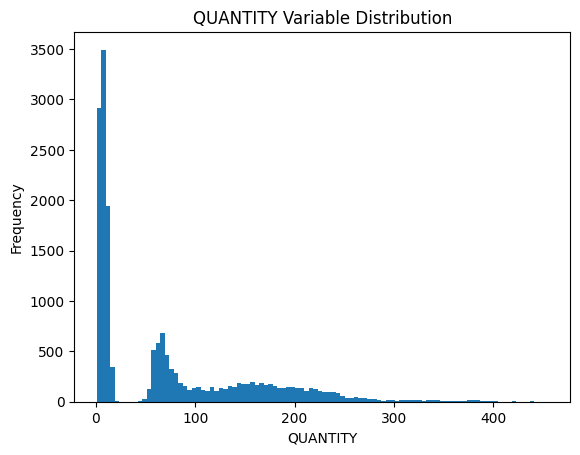

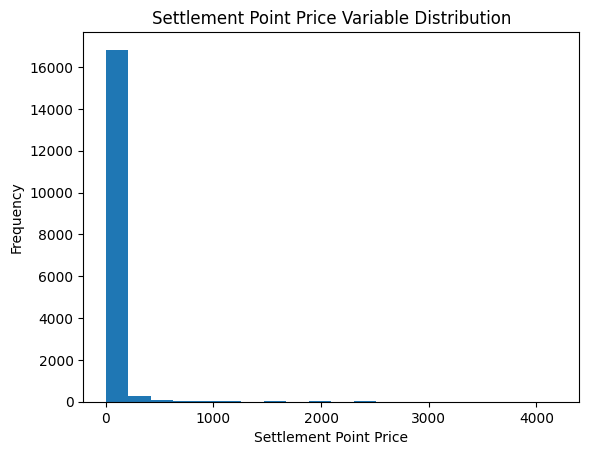

In [9]:
def plot_hist(var_name, bins = 10):
    plt.hist(igs_data[var_name], bins = bins)
    plt.xlabel(var_name)
    plt.ylabel("Frequency")
    plt.title(f"{var_name} Variable Distribution")
    plt.show()

plot_hist("QUANTITY", bins = 100)
plot_hist("Settlement Point Price", bins = 20)

Seems like all Null Values occur on the same day

In [16]:
null_values = igs_data[igs_data["QUANTITY"].isna()]
null_values

Delivery Date_x  Hour Ending  Settlement Point Price Month  \
3402       2023-03-12         23.0                   17.65   Mar   
9256       2023-07-12         24.0                   26.04   Jul   
9257       2023-07-13          1.0                   23.55   Jul   
9258       2023-07-13          2.0                   21.02   Jul   
9259       2023-07-13          3.0                   19.59   Jul   
9260       2023-07-13          4.0                   18.61   Jul   
9261       2023-07-13          5.0                   18.05   Jul   
9262       2023-07-13          6.0                   19.08   Jul   
9263       2023-07-13          7.0                   19.05   Jul   
9264       2023-07-13          8.0                   19.12   Jul   
9265       2023-07-13          9.0                   19.60   Jul   
9266       2023-07-13         10.0                   23.61   Jul   
9267       2023-07-13         11.0                   31.32   Jul   
9268       2023-07-13         12.0                   39.71   Jul   
9269       2023-07-13         13.0                   53.02   Jul   
9270       2023-07-13         14.0                  123.31   Jul   
9271       2023-07-13         15.0                  174.31   Jul   
9272       2023-07-13         16.0                  258.21   Jul   
9273       2023-07-13         17.0                  356.25   Jul   
9274       2023-07-13         18.0                  265.71   Jul   
9275       2023-07-13         19.0                  250.71   Jul   
9276       2023-07-13         20.0                  239.76   Jul   
9277       2023-07-13         21.0                  170.00   Jul   
9278       2023-07-13         22.0                   62.14   Jul   
9279       2023-07-13         23.0                   36.82   Jul   
10240      2023-08-02         24.0                   26.65   Aug   
10241      2023-08-03          1.0                   25.13   Aug   
10242      2023-08-03          2.0                   22.60   Aug   
10243      2023-08-03          3.0                   21.28   Aug   
10244      2023-08-03          4.0                   19.93   Aug   
10245      2023-08-03          5.0                   19.88   Aug   
10246      2023-08-03          6.0                   21.33   Aug   
10247      2023-08-03          7.0                   20.99   Aug   
10248      2023-08-03          8.0                   21.29   Aug   
10249      2023-08-03          9.0                   21.16   Aug   
10250      2023-08-03         10.0                   21.30   Aug   
10251      2023-08-03         11.0                   26.69   Aug   
10252      2023-08-03         12.0                   31.92   Aug   
10253      2023-08-03         13.0                   44.66   Aug   
10254      2023-08-03         14.0                   75.62   Aug   
10255      2023-08-03         15.0                  150.32   Aug   
10256      2023-08-03         16.0                  252.23   Aug   
10257      2023-08-03         17.0                  302.94   Aug   
10258      2023-08-03         18.0                  196.83   Aug   
10259      2023-08-03         19.0                  190.95   Aug   
10260      2023-08-03         20.0                  326.80   Aug   
10261      2023-08-03         21.0                  184.14   Aug   
10262      2023-08-03         22.0                   47.58   Aug   
10263      2023-08-03         23.0                   33.53   Aug   
17463      2023-12-31         24.0                   15.45   Dec   

                  DateTime ACCOUNT_NUMBER LOCAL_FROM_DATETIME  QUANTITY  \
3402   2023-03-12 23:00:00            NaN                 NaN       NaN   
9256   2023-07-13 00:00:00            NaN                 NaN       NaN   
9257   2023-07-13 01:00:00            NaN                 NaN       NaN   
9258   2023-07-13 02:00:00            NaN                 NaN       NaN   
9259   2023-07-13 03:00:00            NaN                 NaN       NaN   
9260   2023-07-13 04:00:00            NaN                 NaN       NaN   
9261   2023-

2023-07-13 all day is null
2023-08-03 all day is null

2023-03-12 23:00:00 is null for one hour
2024-01-01 00:00:00 is null for one hour

In [10]:
igs_data[igs_data["Settlement Point Price"].isna()]

Empty DataFrame
Columns: [ACCOUNT_NUMBER, LOCAL_FROM_DATETIME, LOCAL_TO_DATETIME, QUANTITY, Delivery Date, Settlement Point Price, Month]
Index: []

Settlement Point Price is null when Hour Ending is Null but not hour. 

The null values occur at 2023-01-01 00:00:00 and 2023-03-12 03:00:00

Text(0.5, 1.0, 'Quantity Vs. Price')

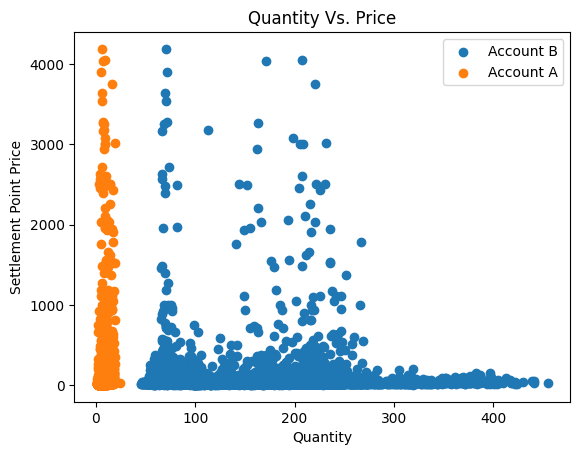

In [11]:
accnt_a_data = igs_data[igs_data["ACCOUNT_NUMBER"] == "account_a"]
accnt_b_data = igs_data[igs_data["ACCOUNT_NUMBER"] == "account_b"]

plt.scatter(accnt_b_data["QUANTITY"], accnt_b_data["Settlement Point Price"], label = "Account B")
plt.scatter(accnt_a_data["QUANTITY"], accnt_a_data["Settlement Point Price"], label = "Account A")
plt.legend()
plt.xlabel("Quantity")
plt.ylabel("Settlement Point Price")
plt.title("Quantity Vs. Price")

# Account A

Text(0.5, 1.0, 'Account Quantity Vs. Price')

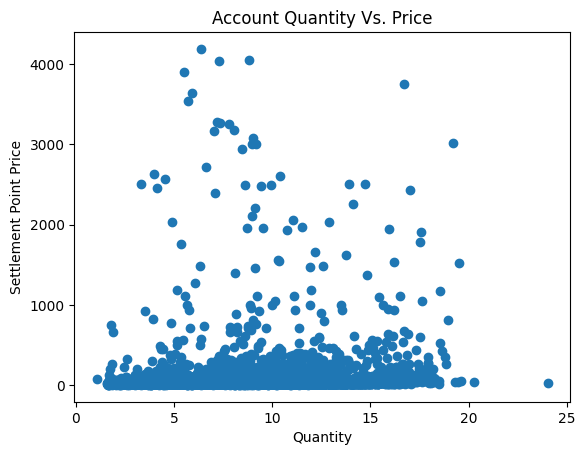

In [12]:
plt.scatter(accnt_a_data["QUANTITY"], accnt_a_data["Settlement Point Price"])
plt.xlabel("Quantity")
plt.ylabel("Settlement Point Price")
plt.title("Account Quantity Vs. Price")

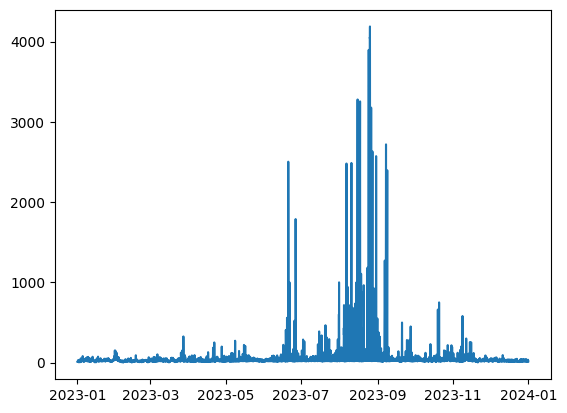

In [54]:
plt.plot(accnt_a_data["LOCAL_FROM_DATETIME"], accnt_a_data["Settlement Point Price"])

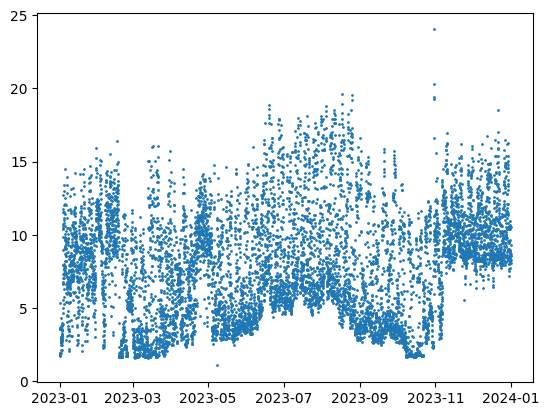

In [58]:
plt.scatter(accnt_a_data["LOCAL_FROM_DATETIME"], accnt_a_data["QUANTITY"], s = 1)

In [243]:
#igs_data["Delivery Date"] = pd.to_datetime(igs_data["Delivery Date"])



AttributeError: 'datetime.datetime' object has no attribute 'week'

Add Weekend and Holiday Columns

In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()

start_date = igs_data["LOCAL_FROM_DATETIME"].min()
end_date = igs_data["LOCAL_FROM_DATETIME"].max()

holidays = cal.holidays(start=start_date, end=end_date).to_pydatetime()

igs_data = igs_data.assign(
    Hour = lambda x: x["LOCAL_FROM_DATETIME"].dt.hour,
    Holiday = lambda x: x["Delivery Date"].isin(holidays),
    Day = lambda x: x["LOCAL_FROM_DATETIME"].dt.day,
    Weekend = lambda x: x["LOCAL_FROM_DATETIME"].dt.weekday >= 5
)

In [14]:
import numpy as np
from matplotlib.lines import Line2D

def plot_month_var(data_col, month, account_type, include_weekend = False, ymax = None):

    title_format = data_col.lower().title()
    account = igs_data[igs_data["ACCOUNT_NUMBER"] == account_type]

    month_var = account["Month"] == month
    month_data = account[month_var]

    days = month_data["Day"].unique()
    fig, ax = plt.subplots()

    n = len(days)
    #colors = plt.cm.Reds(np.linspace(0, 1, n))

    for i, day in enumerate(days):

        day_subset = month_data["Day"] == day
        day_data = month_data.loc[day_subset,:]

        if day_data["Weekend"].all():
            color = "C0"
        elif day_data["Holiday"].all():
            color = "C1"
        else:
            color = "C2"

        ax.plot(day_data["Hour"], day_data[data_col], c = color)#colors[i])

    # create manual symbols for legend
    weekend_label = Line2D([0], [0], label='Weekend', color='C0')  
    holiday_label = Line2D([0], [0], label='Holiday', color='C1')
    weekday_label = Line2D([0], [0], label='Weekday', color='C2')
    
    ax.set_title(f"{title_format} Variation Over a Day in {month} \n Account {account_type[-1:].upper()}")
    ax.set_xlabel("Hour")
    ax.set_ylabel(title_format)
    ax.set_ylim(0,ymax)
    plt.legend(handles=[weekend_label, holiday_label, weekday_label])
    plt.show()

Account A Quanity:

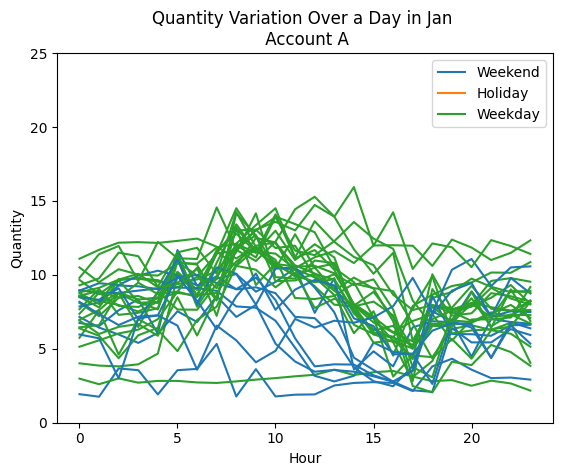

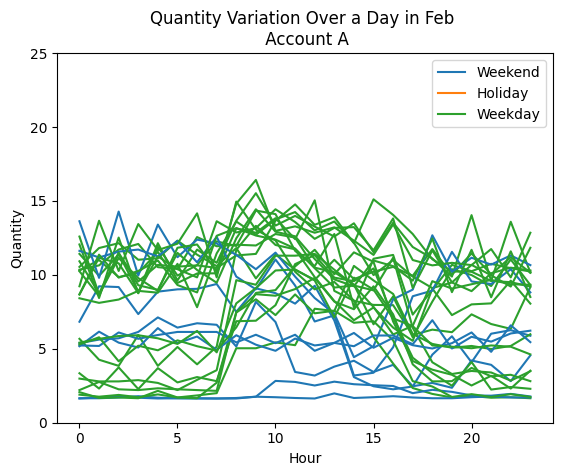

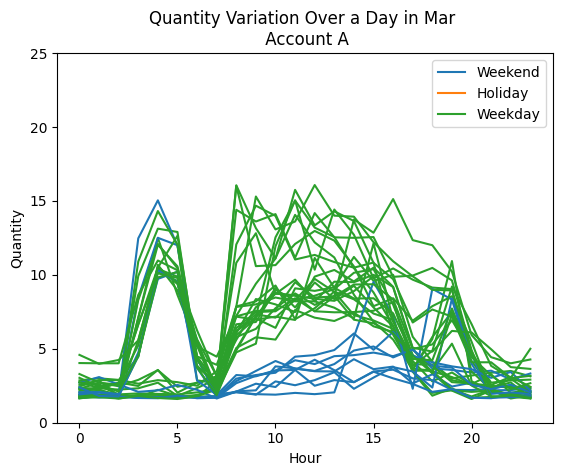

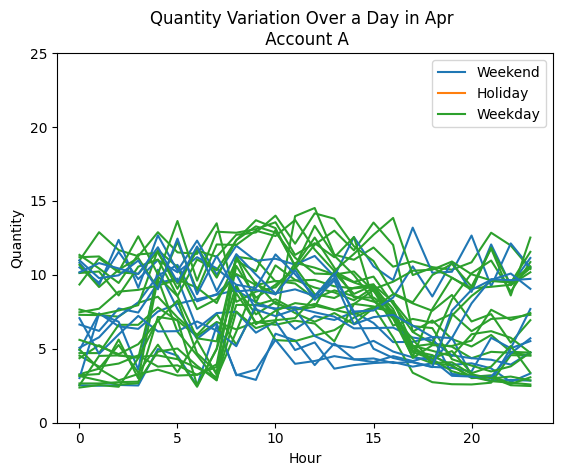

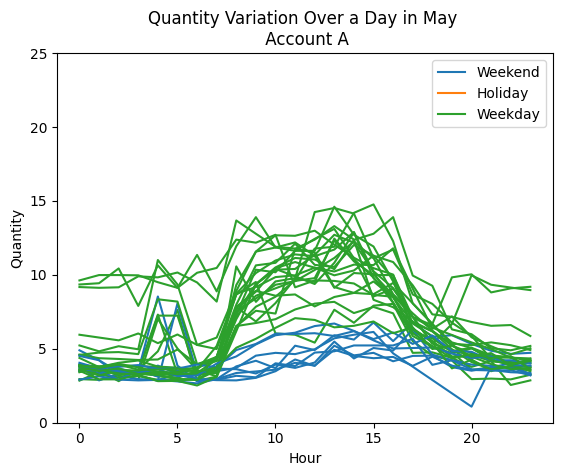

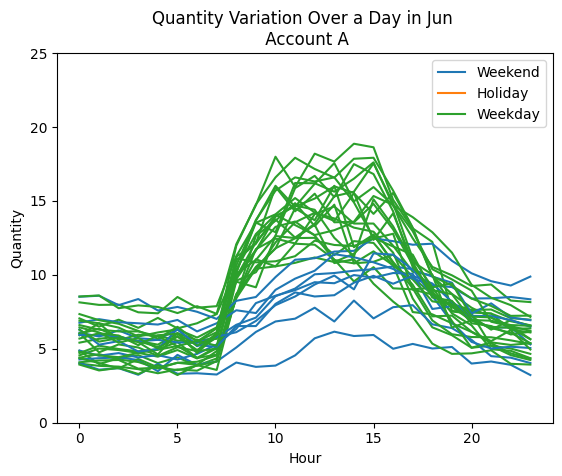

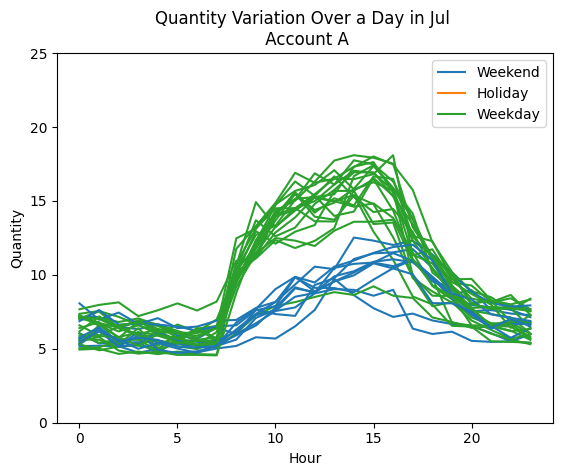

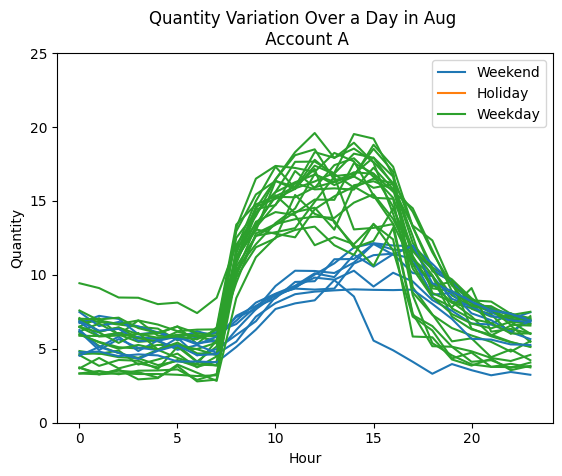

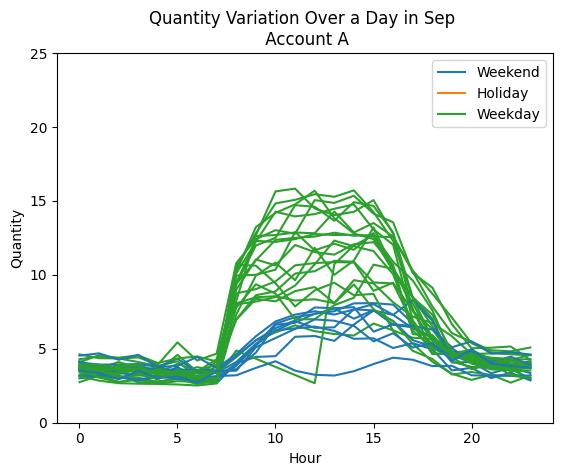

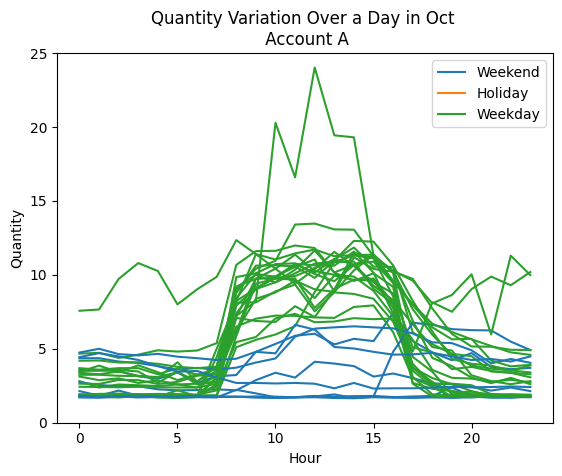

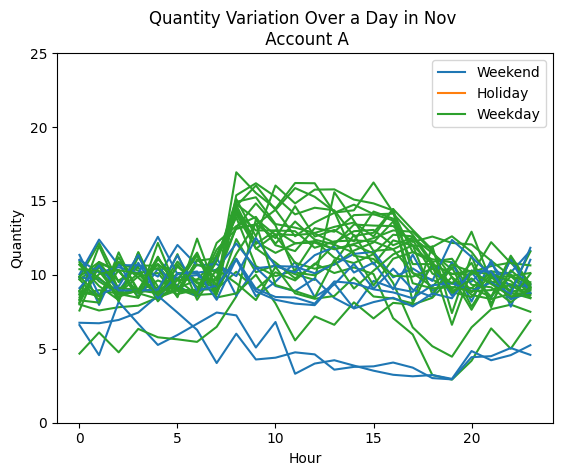

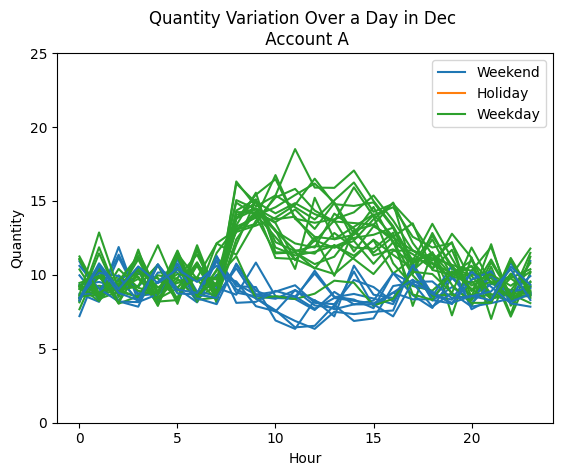

In [15]:
months = []
months = igs_data["Month"].unique()

for month in months:
    plot_month_var("QUANTITY", month, "account_a", ymax = 25)

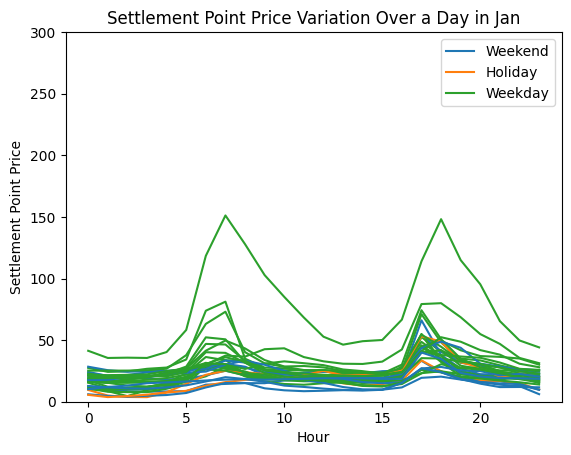

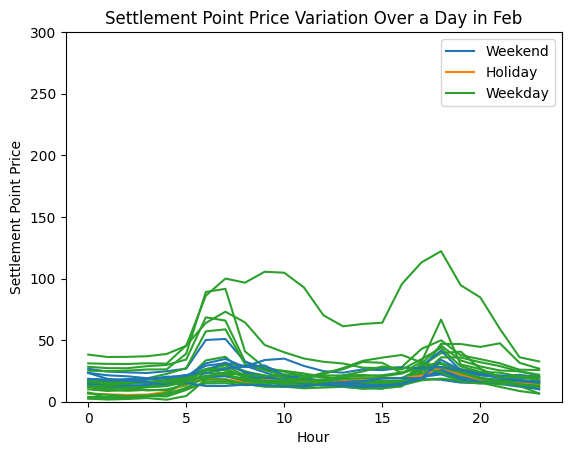

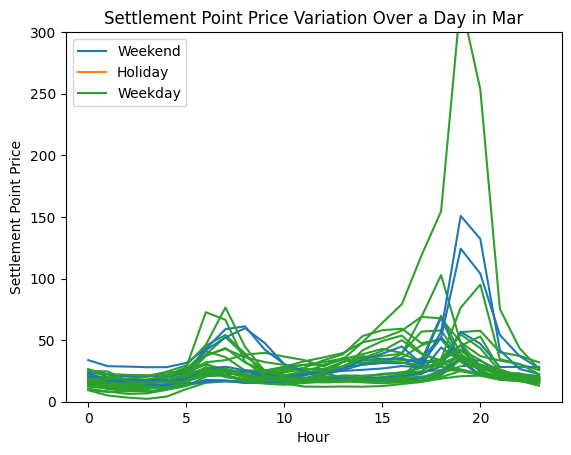

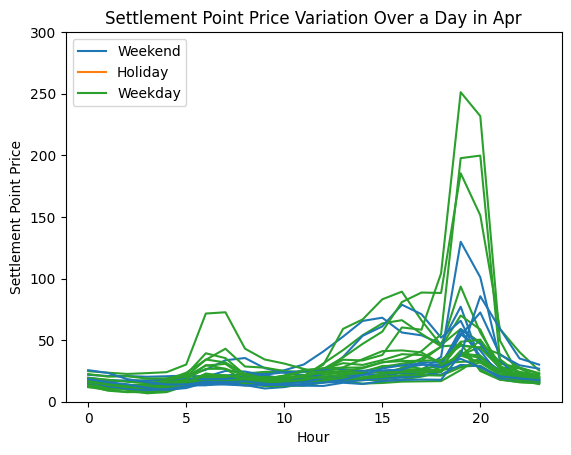

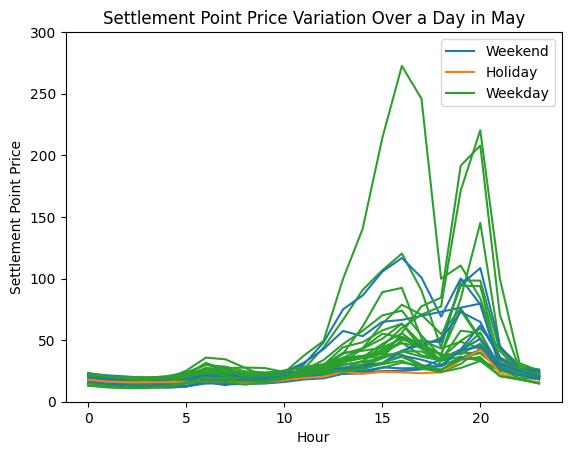

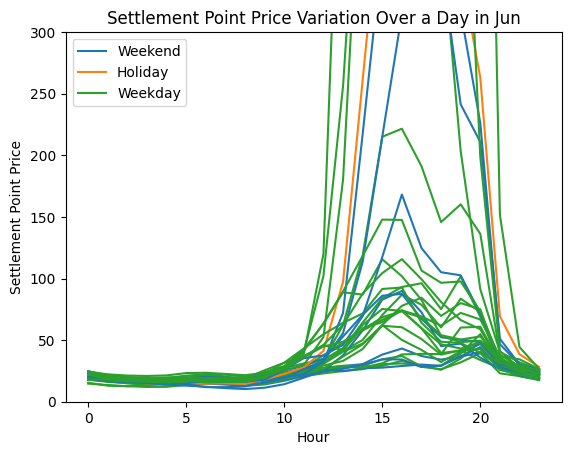

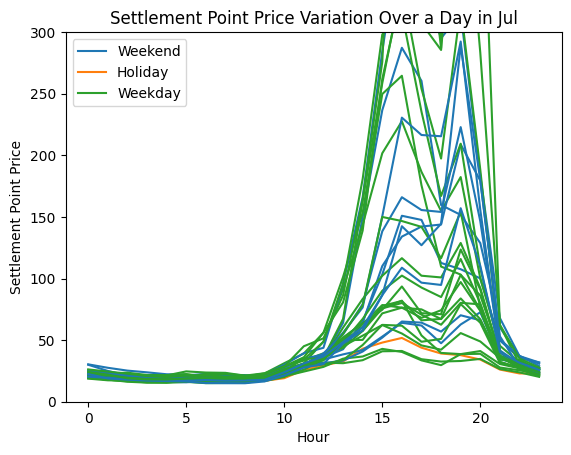

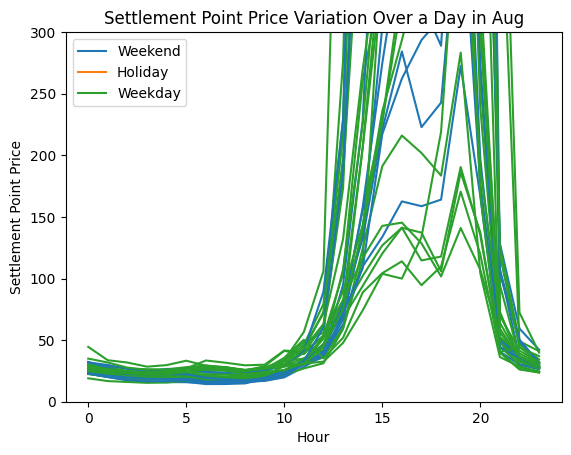

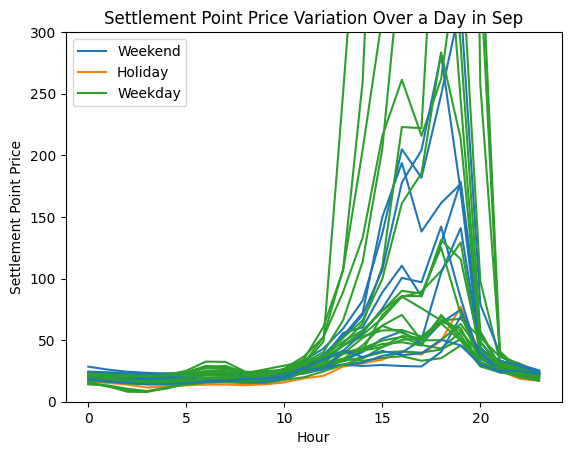

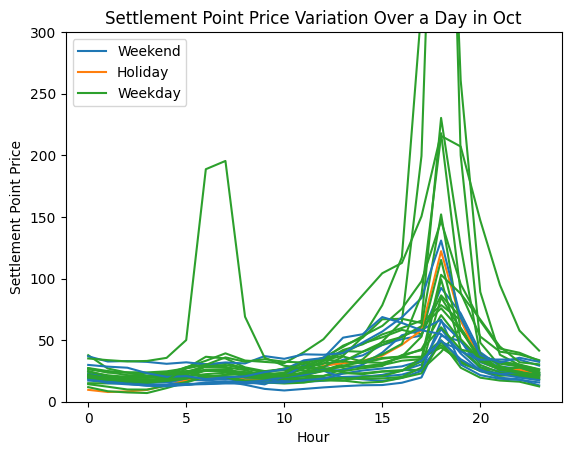

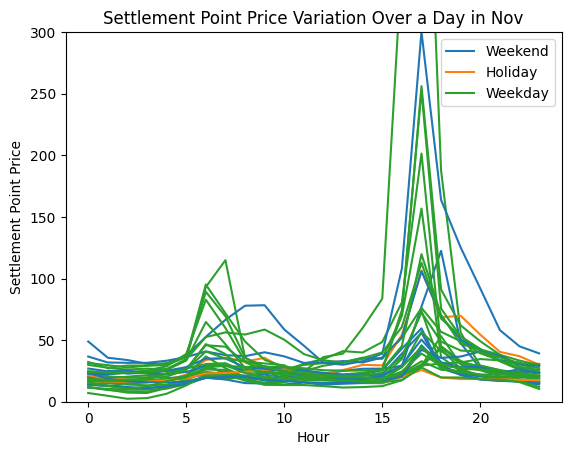

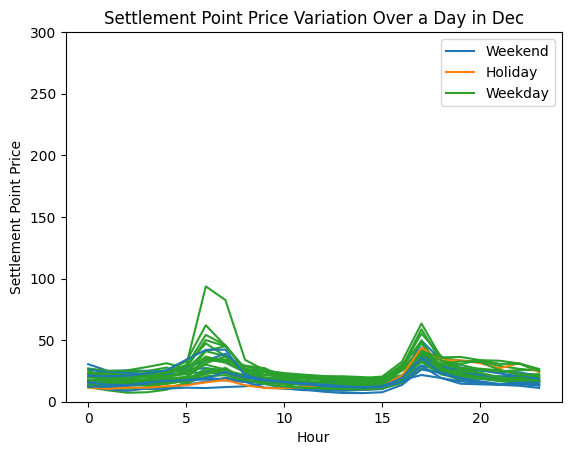

In [202]:
months = []
months = igs_data["Month"].unique()

for month in months:
    plot_month_var("Settlement Point Price", month, "account_a")

Settlement prices increase immensely throughout the day

Text(0.5, 1.0, 'Engery Price Related to Time of Day')

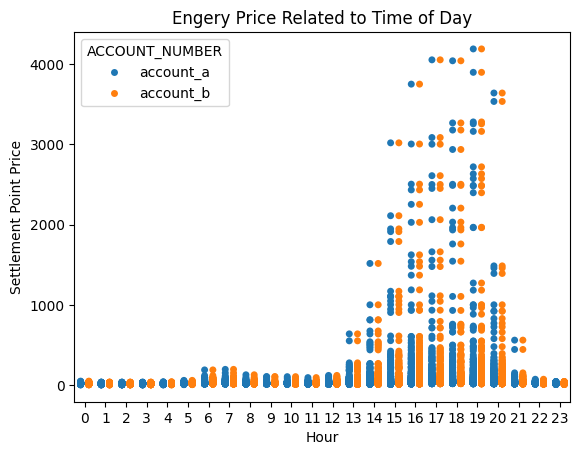

In [196]:
# The settlement price is always largest at night
import seaborn as sns

# The Price point is the same whether you are a company or a business
sns.stripplot(x = "Hour", y = "Settlement Point Price", hue = "ACCOUNT_NUMBER", data = igs_data, dodge = True, jitter = False)
plt.title("Engery Price Related to Time of Day")

0       2023-01-01
1       2023-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
17408   2023-12-31
17409   2023-12-31
17410   2023-05-07
17411   2023-05-07
17412   2023-05-07
Name: Delivery Date, Length: 5035, dtype: datetime64[ns]

Plotting All Weekend Prices

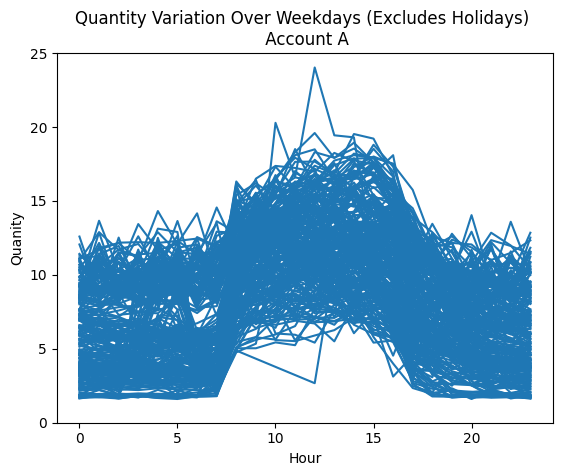

In [183]:
    
subset_data = igs_data[-igs_data["Weekend"] & -igs_data["Holiday"]]
subset_data = subset_data[subset_data["ACCOUNT_NUMBER"] == "account_a"]

dates = subset_data["Delivery Date"].unique()

fig, ax = plt.subplots()

for date in dates:

    date_data = subset_data[subset_data["Delivery Date"] == date]

    ax.plot(date_data["Hour"], date_data["QUANTITY"], c = "C0")
    ax.set_ylim(0, 25)

ax.set_title(f"Quantity Variation Over Weekdays (Excludes Holidays) \n Account A")
ax.set_xlabel("Hour")
ax.set_ylabel("Quanity")
plt.show()

Finding the total quantity for a day across months

In [267]:
for row in igs_data[igs_data["ACCOUNT_NUMBER"] == "account_a"].groupby("Month").aggregate("QUANTITY"):
    print(row)

('Apr', 4316    4.91625
4318    7.40025
4320    6.52050
4322    6.34800
4324    7.52100
         ...   
5746    5.72700
5748    8.07300
5750    9.71175
5752    9.64275
5754    9.72900
Name: QUANTITY, Length: 720, dtype: float64)
('Aug', 10118    6.50325
10120    7.07250
10122    5.95125
10124    6.91725
10126    5.88225
          ...   
11548    5.14050
11550    4.12275
11552    4.22625
11554    3.70875
11556    4.07100
Name: QUANTITY, Length: 720, dtype: float64)
('Dec', 15922     8.38350
15924     9.98775
15926     8.84925
15928     8.53875
15930     8.90100
           ...   
17400     8.10750
17402     8.57325
17404     8.28000
17406    10.55700
17408     9.33225
Name: QUANTITY, Length: 744, dtype: float64)
('Feb', 1488    10.53975
1490    11.81625
1492    12.14400
1494    11.02275
1496    11.12625
          ...   
2822     3.24300
2824     2.51850
2826     3.17400
2828     2.31150
2830     3.51900
Name: QUANTITY, Length: 672, dtype: float64)
('Jan', 0        1.93200
2        1.7595

Weekly Plots of Data

Missing Data Graphs

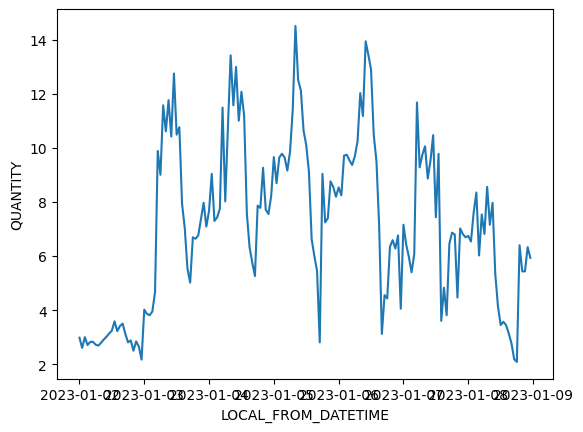

In [259]:
from datetime import timedelta

# missing_data_one_range = igs_data[(igs_data["Delivery Date"] > datetime.datetime(2023, 7, 1)) & (igs_data["Delivery Date"] < datetime.datetime(2023, 7, 25))]
# sns.lineplot(data = missing_data_one_range, x= "LOCAL_FROM_DATETIME", y = "QUANTITY")

init_week = datetime.datetime(2023,1,2)
week_span = timedelta(weeks = 1)

for _ in range(1):

    week_data = igs_data[(igs_data["Delivery Date"] >= init_week) & (igs_data["Delivery Date"] < init_week + week_span) & (igs_data["ACCOUNT_NUMBER"] == "account_a")]
    sns.lineplot(data = week_data, x= "LOCAL_FROM_DATETIME", y = "QUANTITY")
    plt.show()

    init_week += week_span

### Questions Week 1:

1. what happened on 2023-07-13, its all null (Are settlement prices, no quanitity or anything else)
1. what happened on 2023-08-03, its all null
1. Can you just buy energy at the beginning of the day. 

### IGS NOTES:

1. We can add weather data but we don't need to.
1. I think we can charge and use the battery at the same time
1. Look at batteries that are on the market.
1. Data is just consumption
1. They buy energy in real time.
1. Texas Erco prices
1. We can have a piecewise model that makes different predictions for different settings.

### IGS NOTES:

1. Different Strategy for Weekday / Weekends & Holidays, Winter / Sum

### Experimenting with Distributions of Summer, Weekends, and Holidays

Summer months are May - Sep, winter are Oct - April

Split into Weekend, Holiday, and Weekday Distributions.

In [16]:
summer_months = ["May", "Jun", "Jul", "Aug", "Sep"]

summer_data = igs_data[igs_data["Month"].isin(summer_months)]
winter_data = igs_data[~igs_data["Month"].isin(summer_months)]

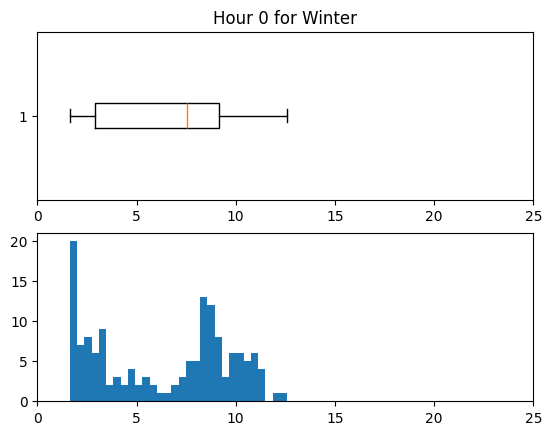

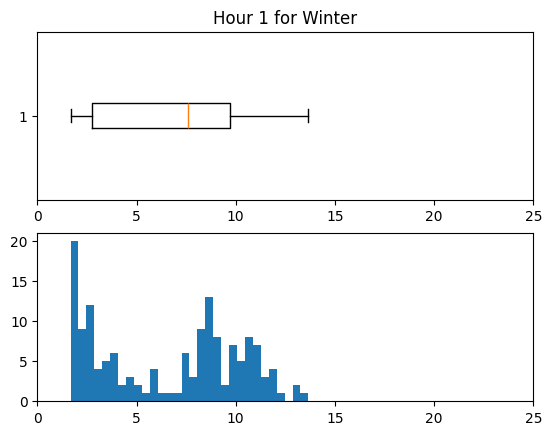

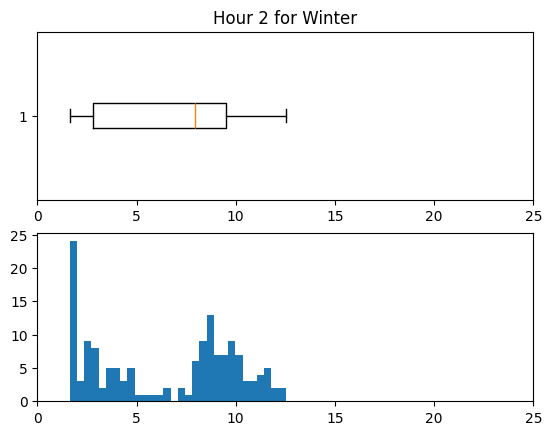

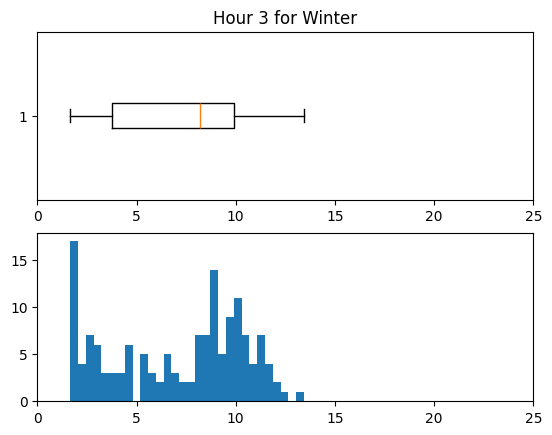

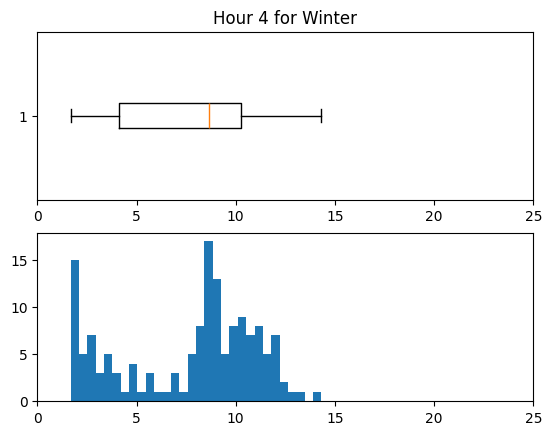

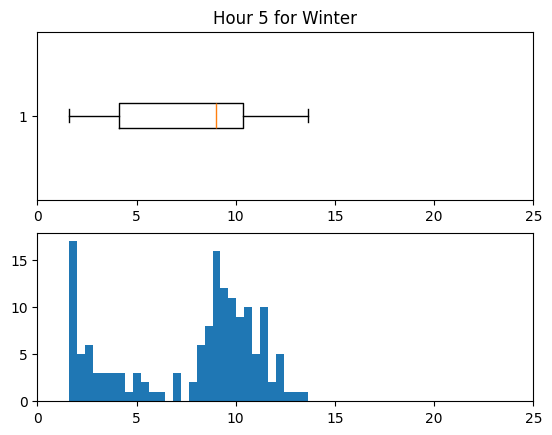

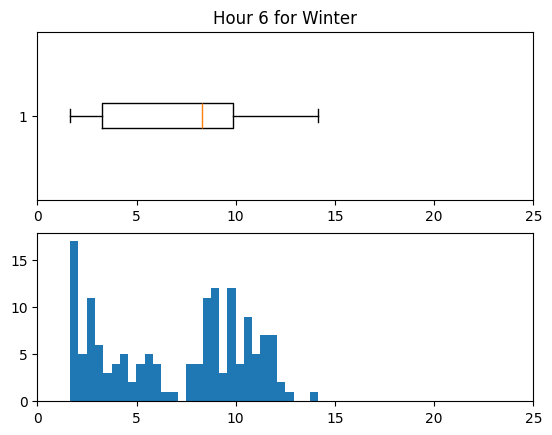

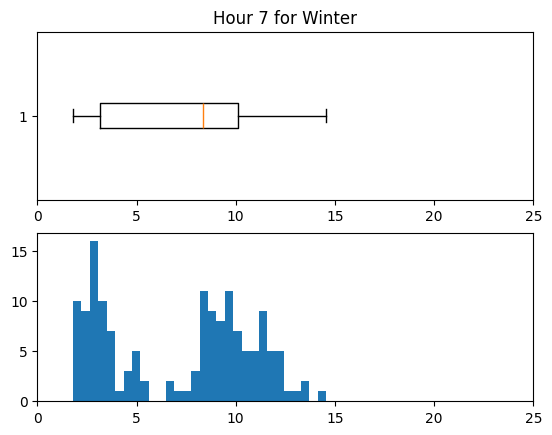

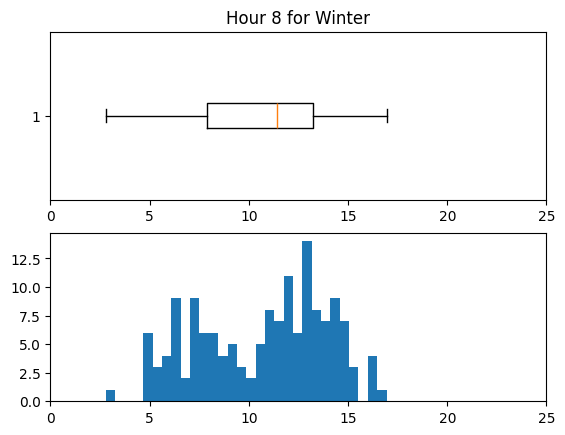

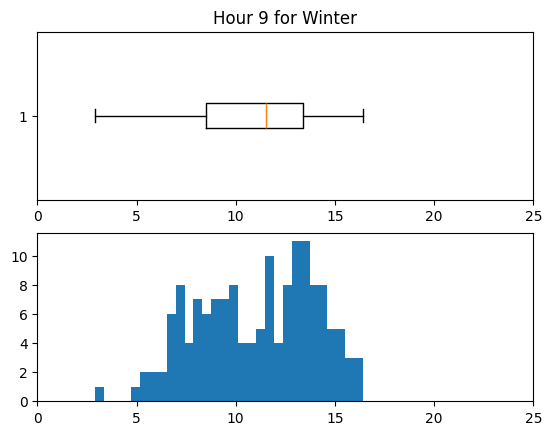

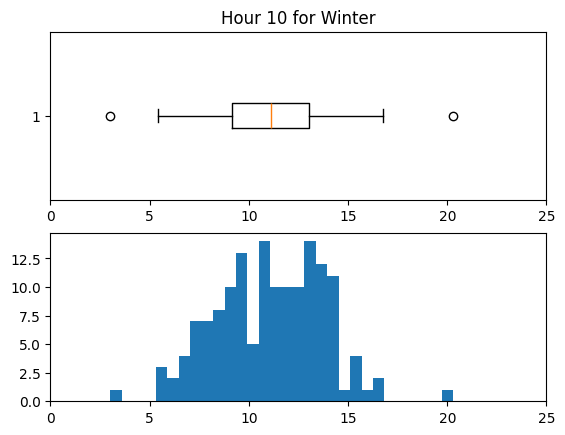

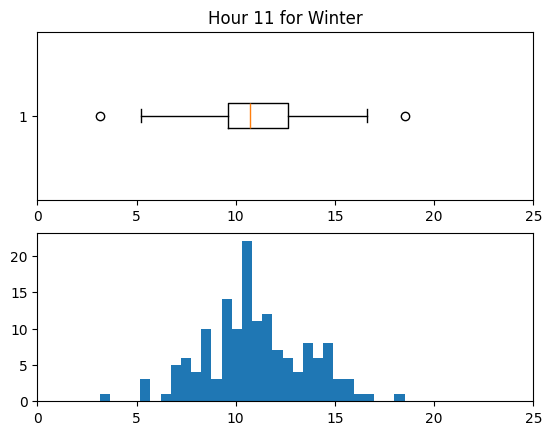

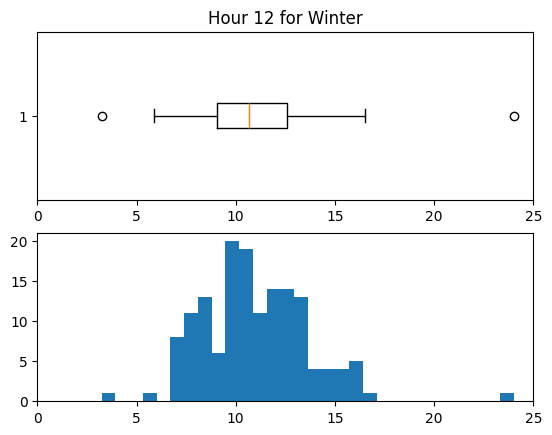

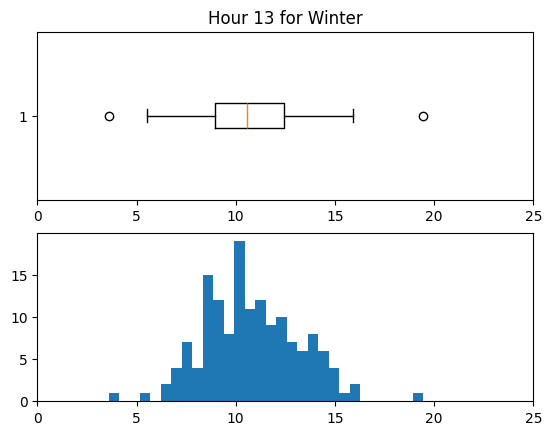

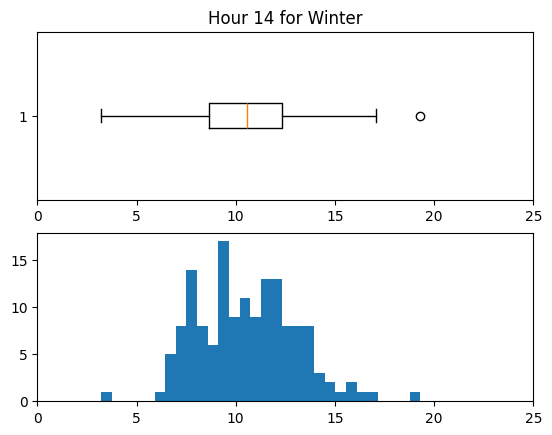

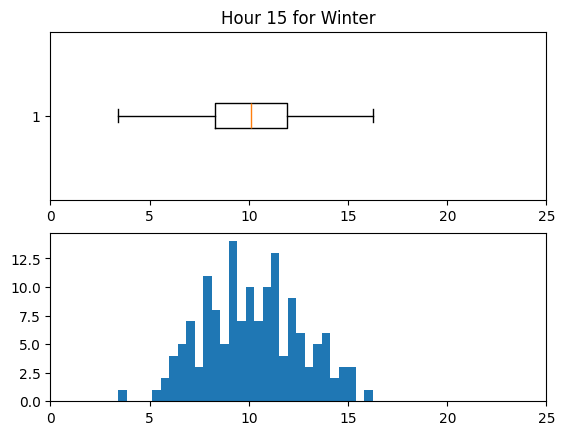

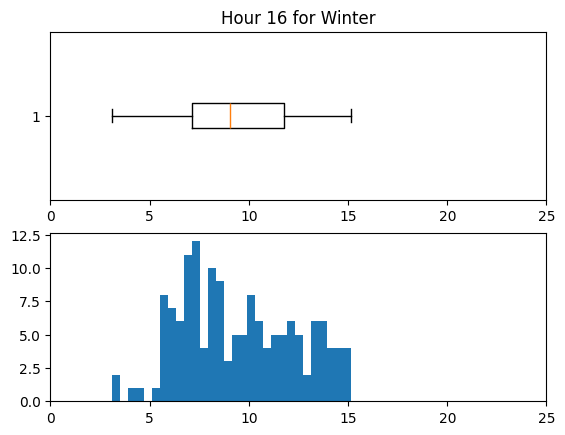

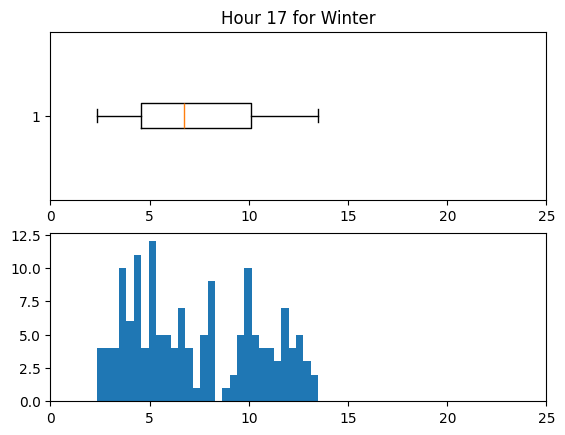

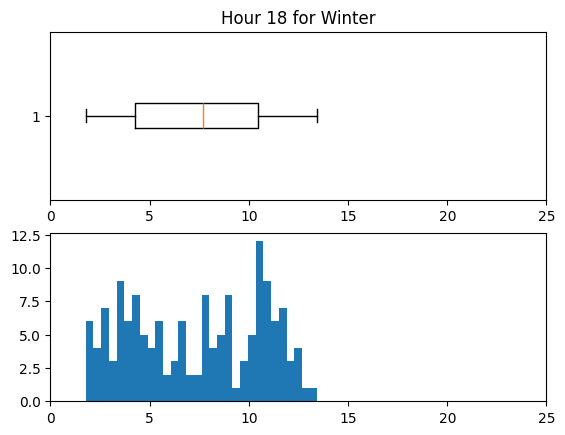

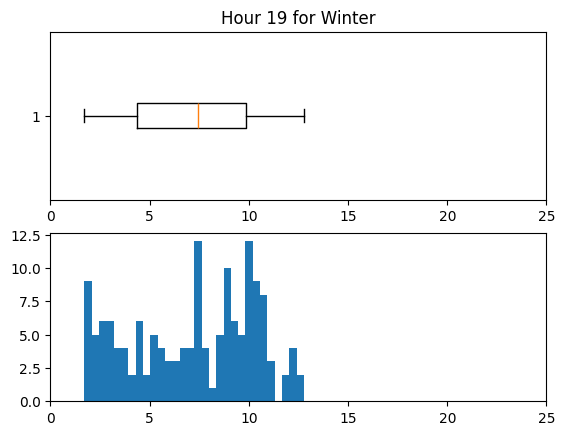

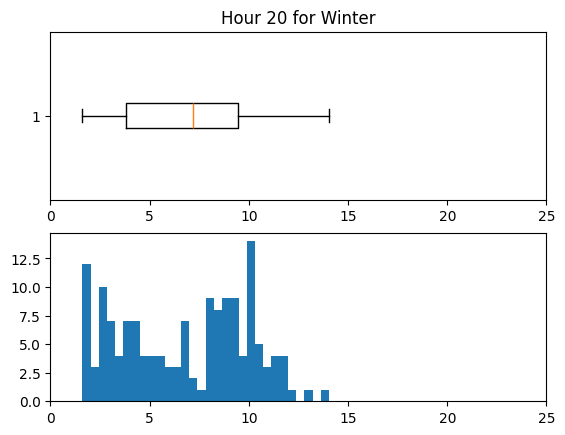

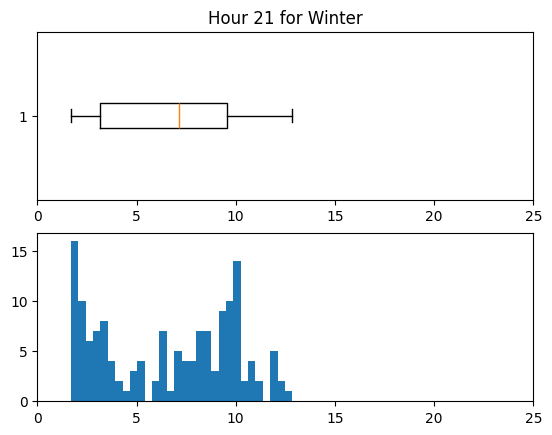

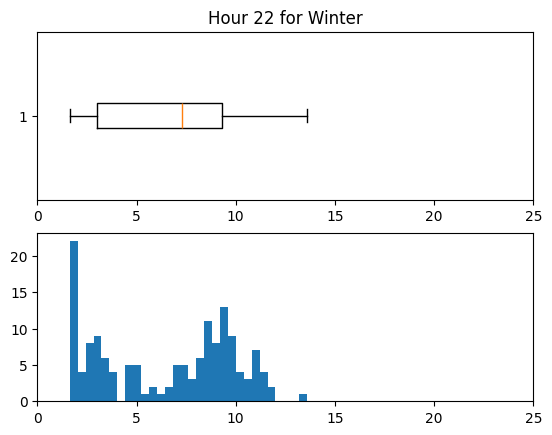

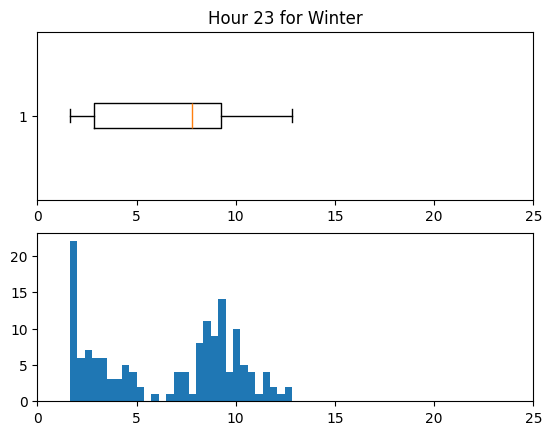

In [17]:
for hour in range(0,24):
    subset = winter_data[(winter_data["Hour"] == hour) & (winter_data["ACCOUNT_NUMBER"] == "account_a") & (~winter_data["Weekend"])]

    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.boxplot(subset["QUANTITY"],  vert = False)
    ax1.set_xlim(0,25)
    ax2.hist(subset["QUANTITY"], bins = 30)
    ax2.set_xlim(0,25)
    ax1.set_title(f"Hour {hour} for Winter")
    plt.show()

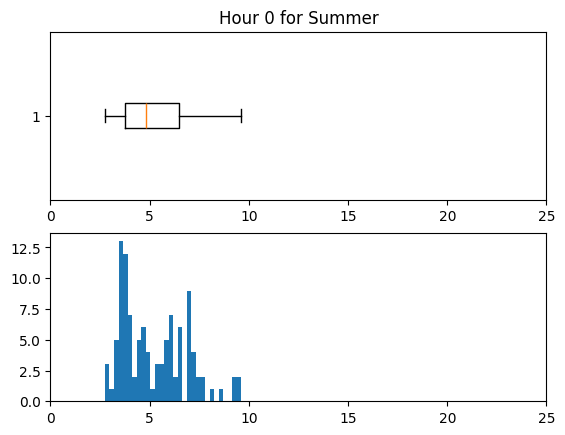

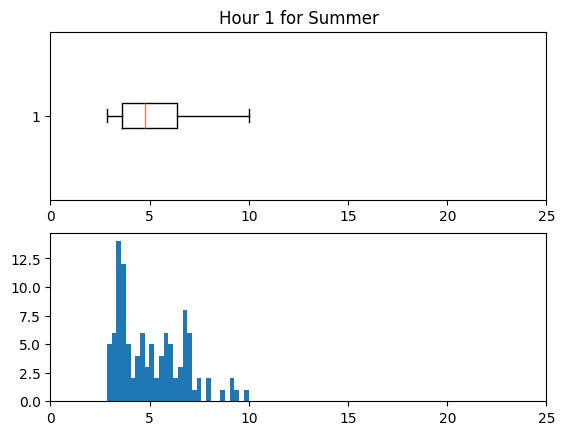

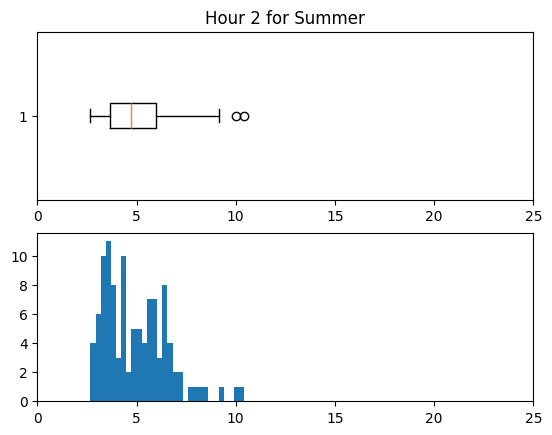

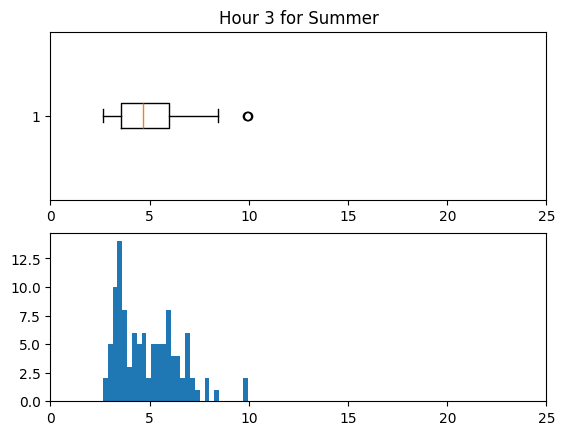

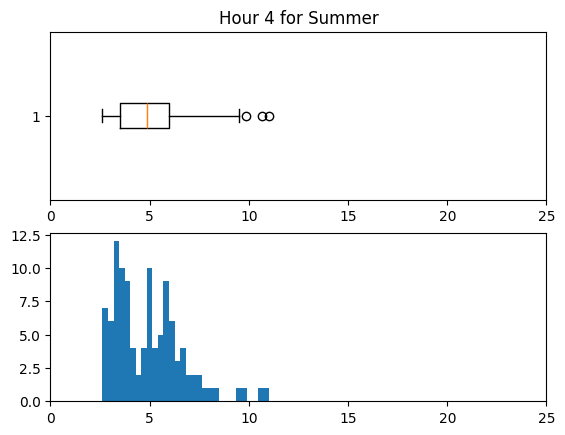

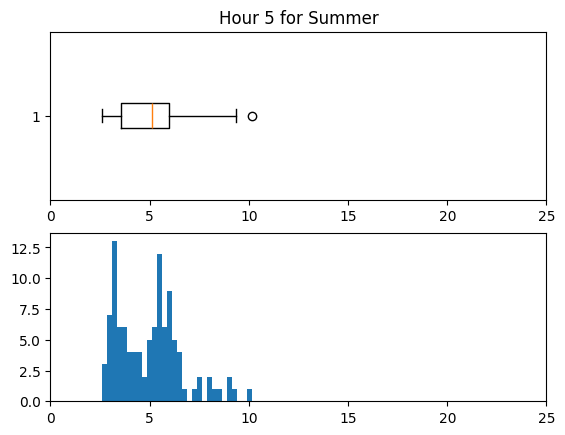

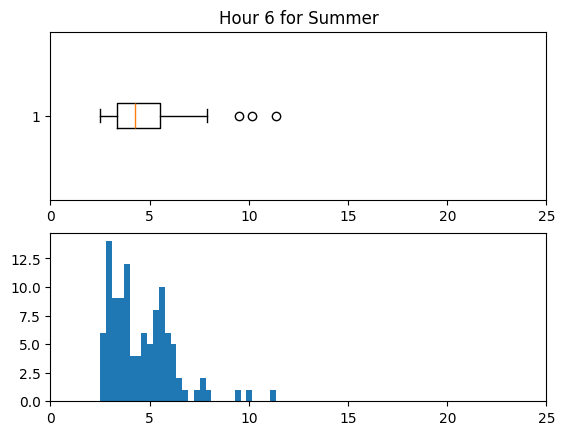

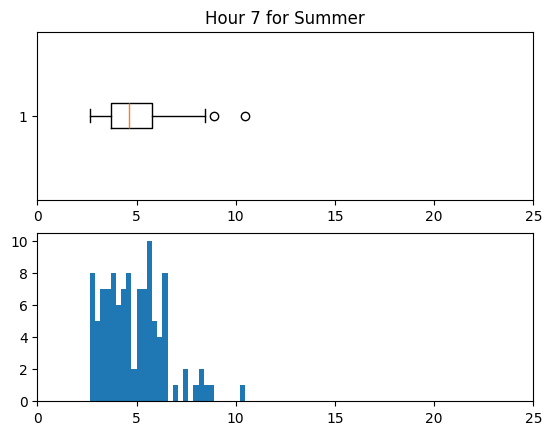

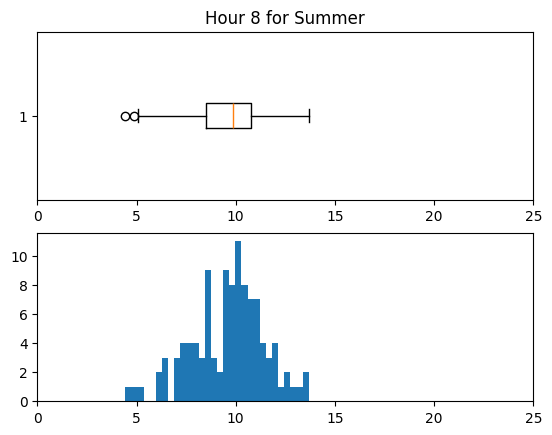

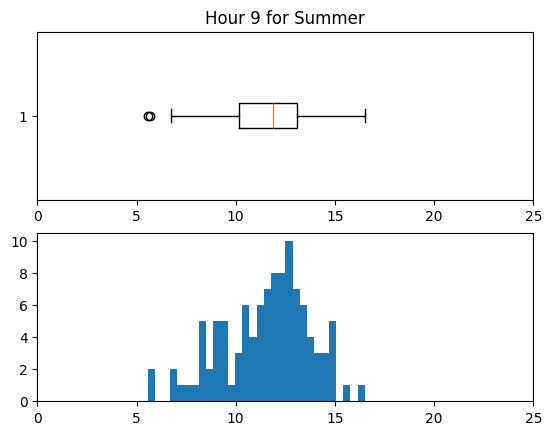

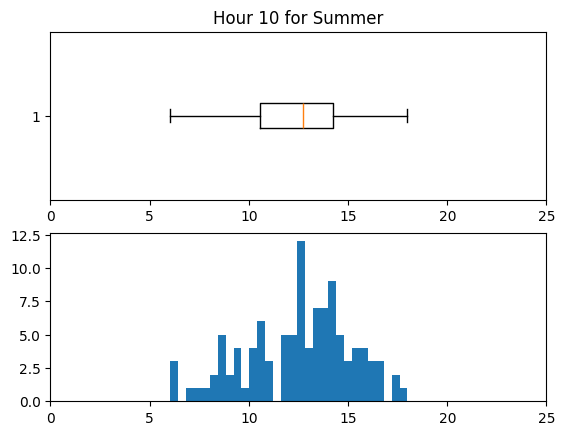

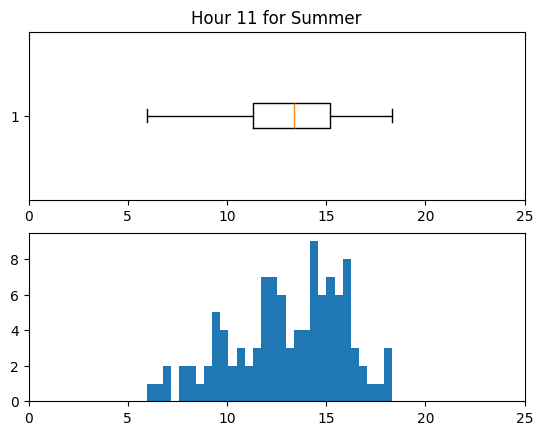

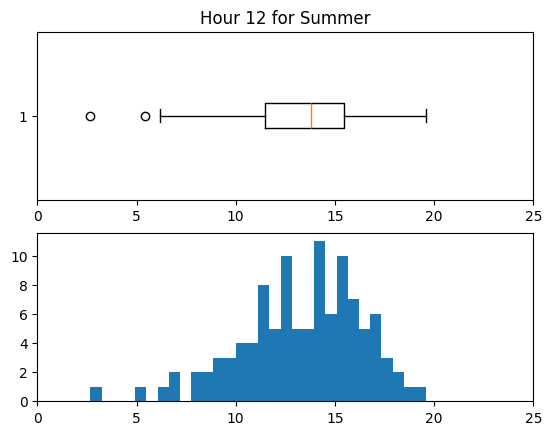

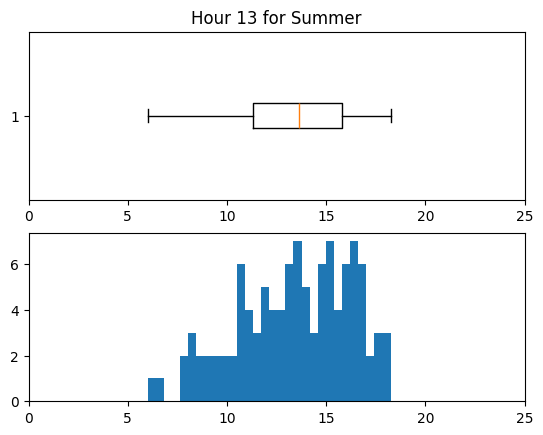

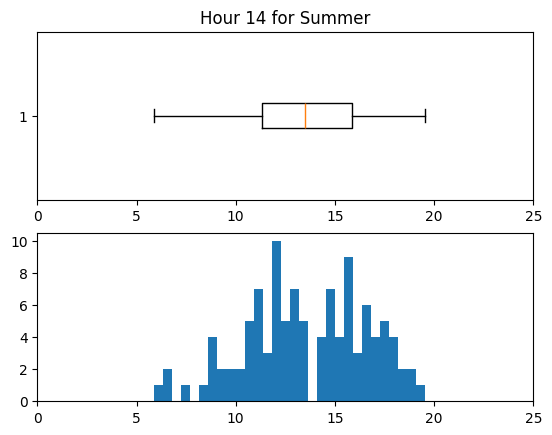

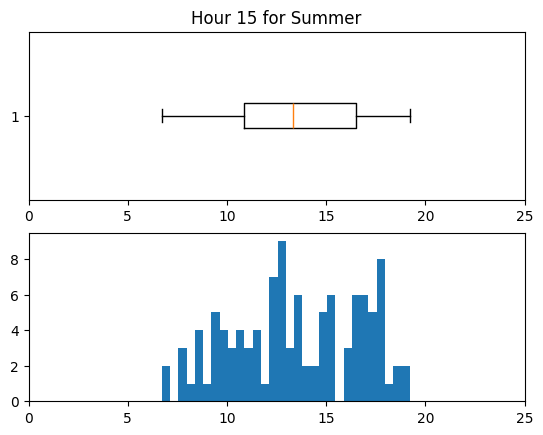

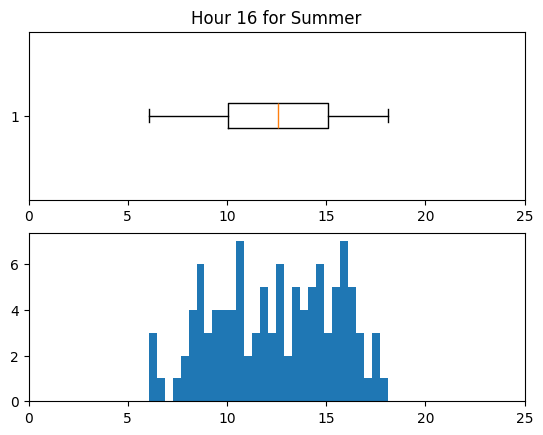

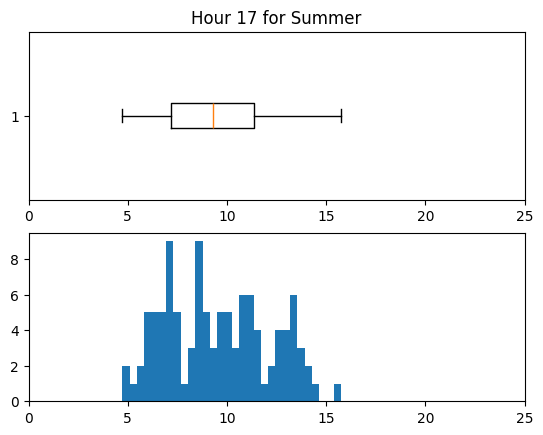

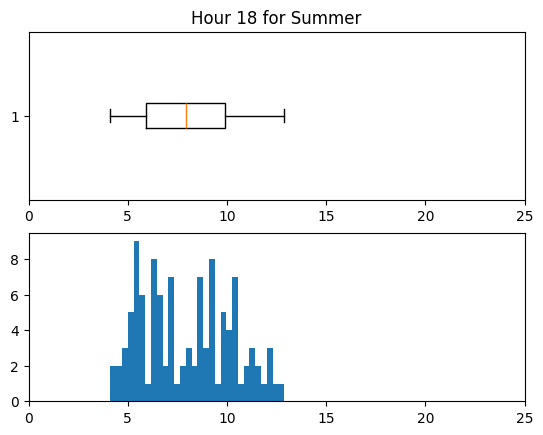

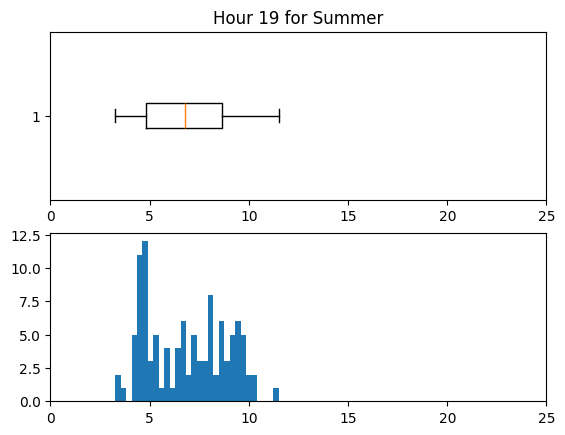

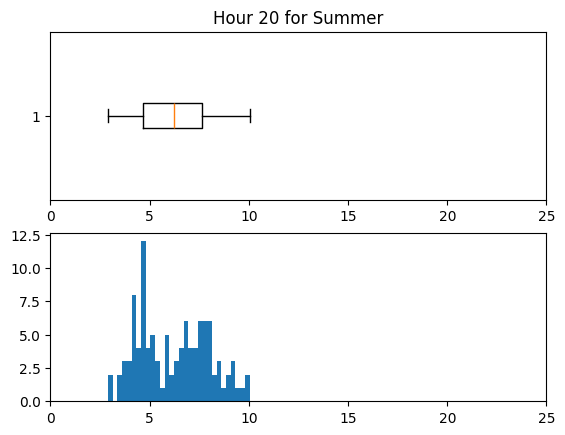

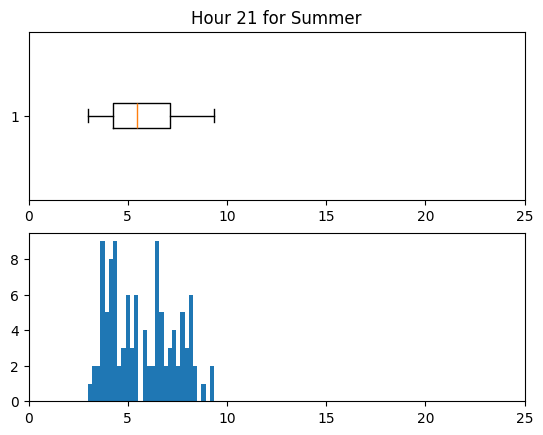

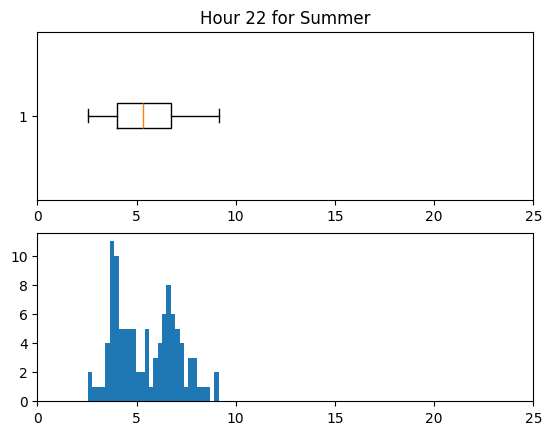

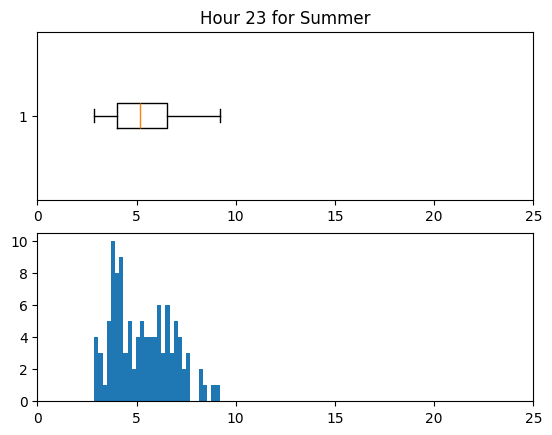

In [310]:
for hour in range(0,24):
    subset = summer_data[(summer_data["Hour"] == hour) & (summer_data["ACCOUNT_NUMBER"] == "account_a") & (~summer_data["Weekend"])]

    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.boxplot(subset["QUANTITY"],  vert = False)
    ax1.set_xlim(0,25)
    ax2.hist(subset["QUANTITY"], bins = 30)
    ax2.set_xlim(0,25)
    ax1.set_title(f"Hour {hour} for Summer")
    plt.show()

### Algorithms to predict when to purchase energy

In [18]:
igs_data["Price_KWH"] = igs_data["Settlement Point Price"] / 1000
account_a_data = igs_data[igs_data["ACCOUNT_NUMBER"] == "account_a"]
account_b_data = igs_data[igs_data["ACCOUNT_NUMBER"] == "account_b"]

In [14]:
worst_case_price_a = (account_a_data["Price_KWH"] * account_a_data["QUANTITY"]).sum()
print(worst_case_price_a)

4581.6175256550005


In [15]:
min_price_per_day = account_a_data.groupby("Delivery Date")["Price_KWH"].aggregate("min")

min_price_per_day = min_price_per_day.rename("min_price")
merged = pd.merge(left= account_a_data, right = min_price_per_day, on="Delivery Date", how="left")

worst_case_price_a = (merged["min_price"] * merged["QUANTITY"]).sum()
print(worst_case_price_a)

1026.8430844425


In [16]:
worst_case_price_b = (account_b_data["Price_KWH"] * account_b_data["QUANTITY"]).sum()
print(worst_case_price_b)

74357.32501142999


Basic Algorithm: Buy during the early hours in the summer, buy during earlier and later hours during the winter. Store up energy when it is most optimal

Question: 
1. What did the home actually pay for energy?
1. What is the current strategy for buying?

Completely decoupled from a supplier, so they are worst case scenario


In [33]:
subset = igs_data.copy()
    
    #["LOCAL_FROM_DATETIME", "Price_KWH", "QUANTITY"]]
subset = subset[subset["ACCOUNT_NUMBER"] == "account_a"]

current_stor = 0
max_stor = 13.5
store_hours = [] 
total_price = 0

for idx, row in subset.sort_values("LOCAL_FROM_DATETIME").iterrows(): 

    row_hour = row["Hour"]
    row_quant = row["QUANTITY"]
    row_price = row["Price_KWH"]

    # The charing and discharging hours
    if row["Month"] in summer_months:
        charge_hour = [0,1,2,3,4]
        discharge_hour = [17,18,19]
    else:
        charge_hour = [1,2,3,11,12,13]
        discharge_hour = [7,8,9,17,18,19]

    # If charging, limit charge amount to 5.
    if row_hour in charge_hour:
        if (max_stor - current_stor) > 5:
            current_stor += 5
            total_price += 5 * row_price
        else:
            total_price += (max_stor - current_stor) * row_price
            current_stor = 13.5

    # If you are discharging, discharge a maximum of 1/3 of energy
    if row_hour in discharge_hour:
        current_stor = current_stor - 13.5 / 3
        row_quant = row_quant - 13.5 / 3

        if current_stor < 0:
            total_price += -current_stor * row_price
            current_stor = 0
        
        if row_quant > 0:
            total_price += row_quant * row_price
    else:
        total_price += row_quant * row_price

print(total_price)

3819.829354632506


### Optimization Test

In [180]:
import cvxpy as cv
import numpy as np

# Optimization by the hour model

def opt_month(list_of_prices, list_of_quantities, num_batteries = 1):
    num_hours = len(list_of_prices)
    battery_stor_cap = 13.5

    purchase_amt = cv.Variable(num_hours, nonneg = True)
    discharge_amt = cv.Variable(num_hours, nonneg = True)
    charge_amt = cv.Variable(num_hours, nonneg = True)
    charge_stor = cv.Variable(num_hours, nonneg = True)
    is_charging = cv.Variable(num_hours, boolean = True)

    obj_function = 0
    for i in range(num_hours):
        obj_function += list_of_prices[i] * purchase_amt[i]

    constraints = []
    constraints.append(charge_amt <= 5)
    constraints.append(discharge_amt[0] == 0)
    constraints.append(charge_stor[0] == 0)
    constraints.append(purchase_amt == list_of_quantities + charge_amt - discharge_amt)
    constraints.append(charge_stor <= battery_stor_cap * num_batteries)

    # If We discharge, we don't charge
    # If we charge, we don't discharge
    constraints.append(discharge_amt <= 0 + (battery_stor_cap * num_batteries) * (1-is_charging))
    constraints.append(discharge_amt <= charge_stor)
    constraints.append(charge_amt <= 0 + 5*is_charging)

    for i in range(1, num_hours):
            constraints.append(charge_stor[i] == charge_stor[i-1] + charge_amt[i-1] - discharge_amt[i-1])
        
    # Define and solve the CVXPY problem.
    prob = cv.Problem(cv.Minimize(obj_function), constraints)
    prob.solve()

    return {"solution" : prob.value, "purchase_amt" : purchase_amt.value, "discharge_amt" : discharge_amt.value, "charge_amt" : charge_amt.value, "charge_stor" : charge_stor.value, "is_charging" : is_charging.value}


def worst_case_scenario(list_of_prices, list_of_quantities):
    sum = 0
    for i in range(len(list_of_prices)):
        sum += list_of_prices[i] * list_of_quantities[i]
    return sum


In [175]:
from tqdm import tqdm

account = "account_a"
account_data = igs_data[igs_data["ACCOUNT_NUMBER"] == account]

baseline_data = []
optimal_data = []


for month in tqdm(igs_data["Month"].unique()):

    month_data = account_data[account_data["Month"] == month]
    month_data = month_data.sort_values(by="LOCAL_FROM_DATETIME")

    list_of_prices = month_data["Price_KWH"].to_list()
    list_of_quantities = month_data["QUANTITY"].to_list()

    baseline_case = worst_case_scenario(list_of_prices, list_of_quantities)
    optimal_case = opt_month(list_of_prices, list_of_quantities)["solution"]

    baseline_data.append(baseline_case)
    optimal_data.append(optimal_case)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:41<00:00,  3.46s/it]


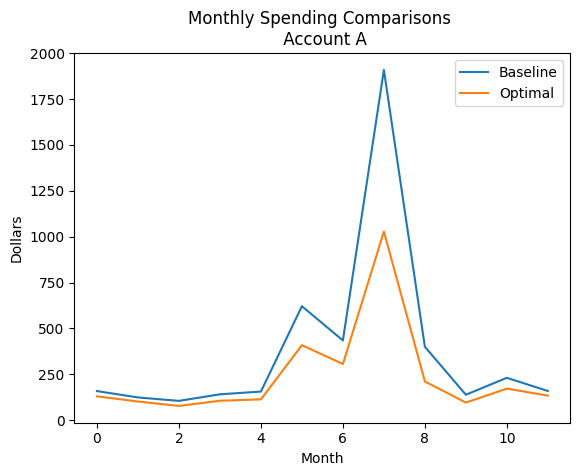

In [176]:
plt.plot(baseline_data, label = "Baseline")
plt.plot(optimal_data, label = "Optimal")
plt.title(f"Monthly Spending Comparisons \n Account {account[-1].upper()}")
plt.ylabel("Dollars")
plt.xlabel("Month")
plt.legend()

Text(0, 0.5, 'Saving Percentage')

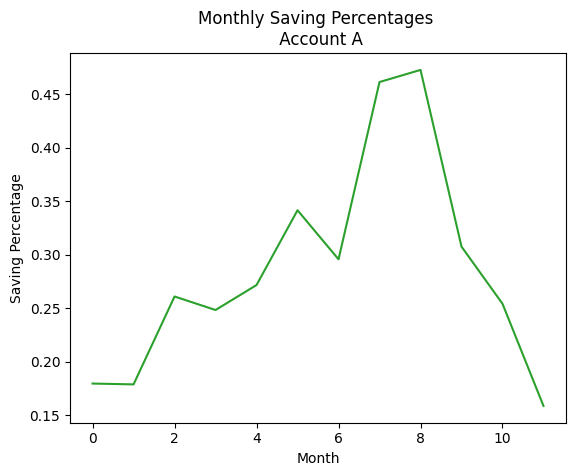

In [177]:
savings_potential = np.array(baseline_data) - np.array(optimal_data)

savings_percentage =   1 - (np.array(optimal_data) / np.array(baseline_data))

plt.plot(savings_percentage, c = "C2")
plt.title(f"Monthly Saving Percentages \n Account {account[-1].upper()}")
plt.xlabel("Month")
plt.ylabel("Saving Percentage")


In [178]:
sum = 0
for val in optimal_data:
    sum += val
print(sum)

2888.218384495002


### Optimal Purchase Strat For Year

In [206]:
account = "account_a"
account_data = igs_data[igs_data["ACCOUNT_NUMBER"] == account]

account_data = account_data.sort_values(by="LOCAL_FROM_DATETIME")

list_of_prices = account_data["Price_KWH"].to_list()
list_of_quantities = account_data["QUANTITY"].to_list()

baseline_year_case = worst_case_scenario(list_of_prices, list_of_quantities)
optimal_year_case = opt_month(list_of_prices, list_of_quantities)

/opt/anaconda3/envs/capstone/lib/python3.12/site-packages/cvxpy/problems/problem.py:158: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


In [23]:
#print(baseline_year_case)
print(optimal_year_case)

73218.0947264301


In [205]:
optimal_data = pd.DataFrame(optimal_year_case)
sorted_account_a = igs_data[igs_data["ACCOUNT_NUMBER"] == "account_a"].sort_values("LOCAL_FROM_DATETIME")
sorted_account_a = sorted_account_a.reset_index()

optimal_data_account_a = sorted_account_a.join(optimal_data)

optimal_data_account_a.to_csv("optimal_account_a.csv")

### Analysis of Single Month

In [541]:
account = "account_a"

month_data = igs_data[(igs_data["ACCOUNT_NUMBER"] == account) & (igs_data["Month"] == "Jul")]
month_data = month_data.sort_values(by="LOCAL_FROM_DATETIME")
month_data = month_data.reset_index(drop = True)

list_of_prices = month_data["Price_KWH"].to_list()
list_of_quantities = month_data["QUANTITY"].to_list()

optimal_case_vars = opt_month(list_of_prices, list_of_quantities)

In [193]:


#joined_data = month_data.join(charge_amt)

(array([532.,   1.,   2.,   2.,   2.,   1.,   0.,   3.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,  27.,   1.,   0.,   1.,   2.,   1.,
          3., 140.]),
 array([0.        , 0.20833333, 0.41666667, 0.625     , 0.83333333,
        1.04166667, 1.25      , 1.45833333, 1.66666667, 1.875     ,
        2.08333333, 2.29166667, 2.5       , 2.70833333, 2.91666667,
        3.125     , 3.33333333, 3.54166667, 3.75      , 3.95833333,
        4.16666667, 4.375     , 4.58333333, 4.79166667, 5.        ]),
 <BarContainer object of 24 artists>)

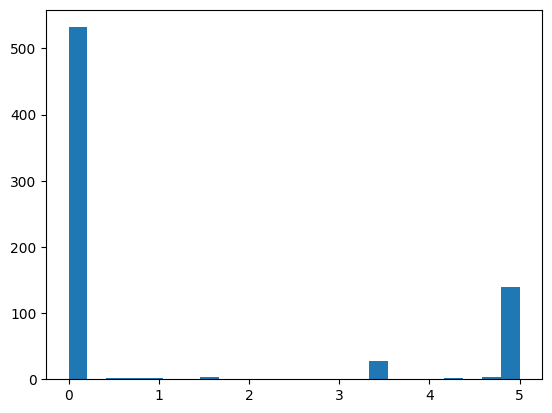

In [548]:
plt.hist(joined_data["charge_amt"], bins = 24)

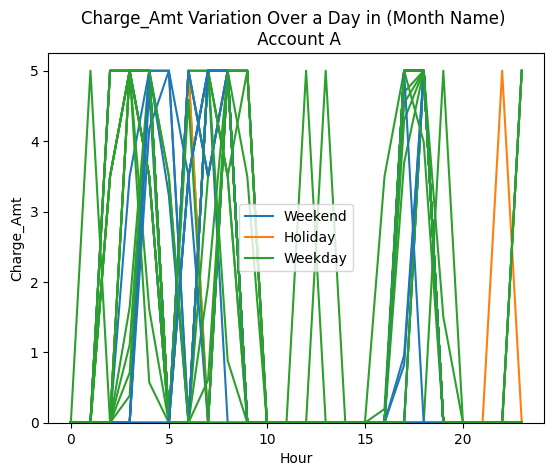

In [543]:
import numpy as np
from matplotlib.lines import Line2D

def plot_month_var_new(data, data_col, account_type, include_weekend = False, ymax = None):

    title_format = data_col.lower().title()
    account = data[data["ACCOUNT_NUMBER"] == account_type]

    days = data["Day"].unique()
    fig, ax = plt.subplots()


    for day in days:

        day_subset = data["Day"] == day
        day_data = data.loc[day_subset,:]

        if day_data["Weekend"].all():
            color = "C0"
        elif day_data["Holiday"].all():
            color = "C1"
        else:
            color = "C2"

        ax.plot(day_data["Hour"], day_data[data_col], c = color)#colors[i])

    # create manual symbols for legend
    weekend_label = Line2D([0], [0], label='Weekend', color='C0')  
    holiday_label = Line2D([0], [0], label='Holiday', color='C1')
    weekday_label = Line2D([0], [0], label='Weekday', color='C2')
    
    ax.set_title(f"{title_format} Variation Over a Day in (Month Name) \n Account {account_type[-1:].upper()}")
    ax.set_xlabel("Hour")
    ax.set_ylabel(title_format)
    ax.set_ylim(0,ymax)
    plt.legend(handles=[weekend_label, holiday_label, weekday_label])
    plt.show()


plot_month_var_new(joined_data, "charge_amt", "account_a",)

In [521]:
import numpy as np
from matplotlib.lines import Line2D

def plot_month_var(data_col, month, account_type, include_weekend = False, ymax = None):

    title_format = data_col.lower().title()
    account = igs_data[igs_data["ACCOUNT_NUMBER"] == account_type]

    month_var = account["Month"] == month
    month_data = account[month_var]

    days = month_data["Day"].unique()
    fig, ax = plt.subplots()

    n = len(days)
    #colors = plt.cm.Reds(np.linspace(0, 1, n))

    for i, day in enumerate(days):

        day_subset = month_data["Day"] == day
        day_data = month_data.loc[day_subset,:]

        if day_data["Weekend"].all():
            color = "C0"
        elif day_data["Holiday"].all():
            color = "C1"
        else:
            color = "C2"

        ax.plot(day_data["Hour"], day_data[data_col], c = color)#colors[i])

    # create manual symbols for legend
    weekend_label = Line2D([0], [0], label='Weekend', color='C0')  
    holiday_label = Line2D([0], [0], label='Holiday', color='C1')
    weekday_label = Line2D([0], [0], label='Weekday', color='C2')
    
    ax.set_title(f"{title_format} Variation Over a Day in {month} \n Account {account_type[-1:].upper()}")
    ax.set_xlabel("Hour")
    ax.set_ylabel(title_format)
    ax.set_ylim(0,ymax)
    plt.legend(handles=[weekend_label, holiday_label, weekday_label])
    plt.show()

744

# Adding Weather Data

In [147]:
weather_data = pd.read_csv("houston_weather_data.csv")
temp_data = weather_data[~weather_data.isna()["TMAX"]]
station_temp = temp_data[temp_data["NAME"] == 'HOUSTON INTERCONTINENTAL AIRPORT, TX US']
station_temp = station_temp[['STATION', 'NAME', 'DATE','TAVG', 'TMAX', 'TMIN']]

In [149]:
igs_data["DATE"] = pd.to_datetime(igs_data["Delivery Date"])
station_temp["DATE"] = pd.to_datetime(station_temp["DATE"])

weather_data = igs_data.merge(station_temp, how = "left", on = "DATE")

In [158]:
max_prices_day = igs_data.groupby("DATE").aggregate({"Settlement Point Price" : "max"})
max_prices_day = max_prices_day.rename(columns = {"Settlement Point Price" : "Max Price"})

weather_data = weather_data.merge(max_prices_day, how = "left", on = "DATE")

Text(0, 0.5, 'Daily Max Settle Log Price')

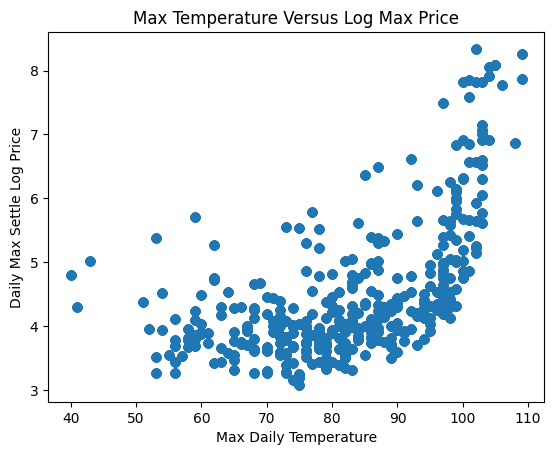

In [168]:
plt.scatter(weather_data["TMAX"], np.log(weather_data["Max Price"]))
plt.title("Max Temperature Versus Log Max Price")
plt.xlabel("Max Daily Temperature")
plt.ylabel("Daily Max Settle Log Price")

In [151]:
weather_data

ACCOUNT_NUMBER LOCAL_FROM_DATETIME     LOCAL_TO_DATETIME   QUANTITY  \
0          account_a 2023-01-01 00:00:00  2023-01-01T00:59:59Z    1.93200   
1          account_b 2023-01-01 00:00:00  2023-01-01T00:59:59Z  186.30000   
2          account_a 2023-01-01 01:00:00  2023-01-01T01:59:59Z    1.75950   
3          account_b 2023-01-01 01:00:00  2023-01-01T01:59:59Z  197.89200   
4          account_a 2023-01-01 02:00:00  2023-01-01T02:59:59Z    3.67425   
...              ...                 ...                   ...        ...   
17411      account_b 2023-05-07 18:00:00  2023-05-07T18:59:59Z   59.96100   
17412      account_b 2023-05-07 19:00:00  2023-05-07T19:59:59Z   55.82100   
17413      account_b 2023-09-12 09:00:00  2023-09-12T09:59:59Z  158.70000   
17414      account_b 2023-09-12 10:00:00  2023-09-12T10:59:59Z  163.46100   
17415      account_b 2023-09-12 11:00:00  2023-09-12T11:59:59Z  170.43000   

      Delivery Date  Settlement Point Price Month  Hour  Holiday  Day  \
0        01/01/2023                   10.36   Jan     0    False    1   
1        01/01/2023                   10.36   Jan     0    False    1   
2        01/01/2023                    9.84   Jan     1    False    1   
3        01/01/2023                    9.84   Jan     1    False    1   
4        01/01/2023                    8.58   Jan     2    False    1   
...             ...                     ...   ...   ...      ...  ...   
17411    05/07/2023                   38.95   May    18    False    7   
17412    05/07/2023                   58.77   May    19    False    7   
17413    09/12/2023                   22.67   Sep     9    False   12   
17414    09/12/2023                   24.61   Sep    10    False   12   
17415    09/12/2023                   30.05   Sep    11    False   12   

       Weekend  Price_KWH       DATE      STATION  \
0         True    0.01036 2023-01-01  USW00012960   
1         True    0.01036 2023-01-01  USW00012960   
2         True    0.00984 2023-01-01  USW00012960   
3         True    0.00984 2023-01-01  USW00012960   
4         True    0.00858 2023-01-01  USW00012960   
...        ...        ...        ...          ...   
17411     True    0.03895 2023-05-07  USW00012960   
17412     True    0.05877 2023-05-07  USW00012960   
17413    False    0.02267 2023-09-12  USW00012960   
17414    False    0.02461 2023-09-12  USW00012960   
17415    False    0.03005 2023-09-12  USW00012960   

                                          NAME  TAVG  TMAX  TMIN  
0      HOUSTON INTERCONTINENTAL AIRPORT, TX US  66.0  79.0  59.0  
1      HOUSTON INTERCONTINENTAL AIRPORT, TX US  66.0  79.0  59.0  
2      HOUSTON INTERCONTINENTAL AIRPORT, TX US  66.0  79.0  59.0  
3      HOUSTON INTERCONTINENTAL AIRPORT, TX US  66.0  79.0  59.0  
4      HOUSTON INTERCONTINENTAL AIRPORT, TX US  66.0  79.0  59.0  
...                                        ...   ...   ...   ...  
17411  HOUSTON INTERCONTINENTAL AIRPORT, TX US  76.0  79.0  74.0  
17412  HOUSTON INTERCONTINENTAL AIRPORT, TX US  76.0  79.0  74.0  
17413  HOUSTON INTERCONTINENTAL AIRPORT, TX US  84.0  97.0  72.0  
17414  HOUSTON INTERCONTINENTAL AIRPORT, TX US  84.0  97.0  72.0  
17415  HOUSTON INTERCONTINENTAL AIRPORT, TX US  84.0  97.0  72.0  

[17416 rows x 18 columns]

In [32]:
### Random Forest Model predicting the quantity given the day, weekend, 

### Battery Diminishing Returns

In [186]:
from tqdm import tqdm

account = "account_b"
account_data = igs_data[igs_data["ACCOUNT_NUMBER"] == account]


costs = []
num_batts_list = []

for num_batteries in tqdm(range(0,50, 10), desc = "Num Batteries"):

    yearly_cost_sum = 0

    for month in tqdm(igs_data["Month"].unique(), desc = "Month", leave = False):

        month_data = account_data[account_data["Month"] == month]
        month_data = month_data.sort_values(by="LOCAL_FROM_DATETIME")

        list_of_prices = month_data["Price_KWH"].to_list()
        list_of_quantities = month_data["QUANTITY"].to_list()

        if num_batteries == 0:
            month_cost = worst_case_scenario(list_of_prices, list_of_quantities)
        else:
            month_cost = opt_month(list_of_prices, list_of_quantities, num_batteries)["solution"]

        yearly_cost_sum += month_cost

    num_batts_list.append(num_batteries)
    costs.append(yearly_cost_sum)

Num Batteries:   0%|          | 0/5 [00:00<?, ?it/s]

Num Batteries: 100%|██████████| 5/5 [02:11<00:00, 26.26s/it]


Text(0, 0.5, 'Cost of Energy for One Year')

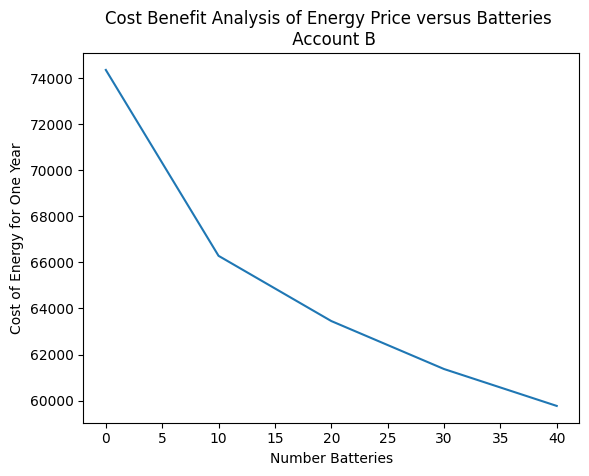

In [187]:
plt.plot(num_batts_list, costs)
plt.title("Cost Benefit Analysis of Energy Price versus Batteries \n Account B")
plt.xlabel("Number Batteries")
plt.ylabel("Cost of Energy for One Year")